In [1]:
options(repr.plot.width = 14, repr.plot.height = 7, repr.plot.res = 150)


In [2]:
library(lubridate);
library(zoo);
library(TSA);data("milk")
write.csv(cbind(time(milk),milk),file = "milkData.csv")

Warning message:
"package 'lubridate' was built under R version 4.3.3"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"package 'zoo' was built under R version 4.3.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Warning message:
"package 'TSA' was built under R version 4.3.3"

Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""axes" is not a graphical parameter"


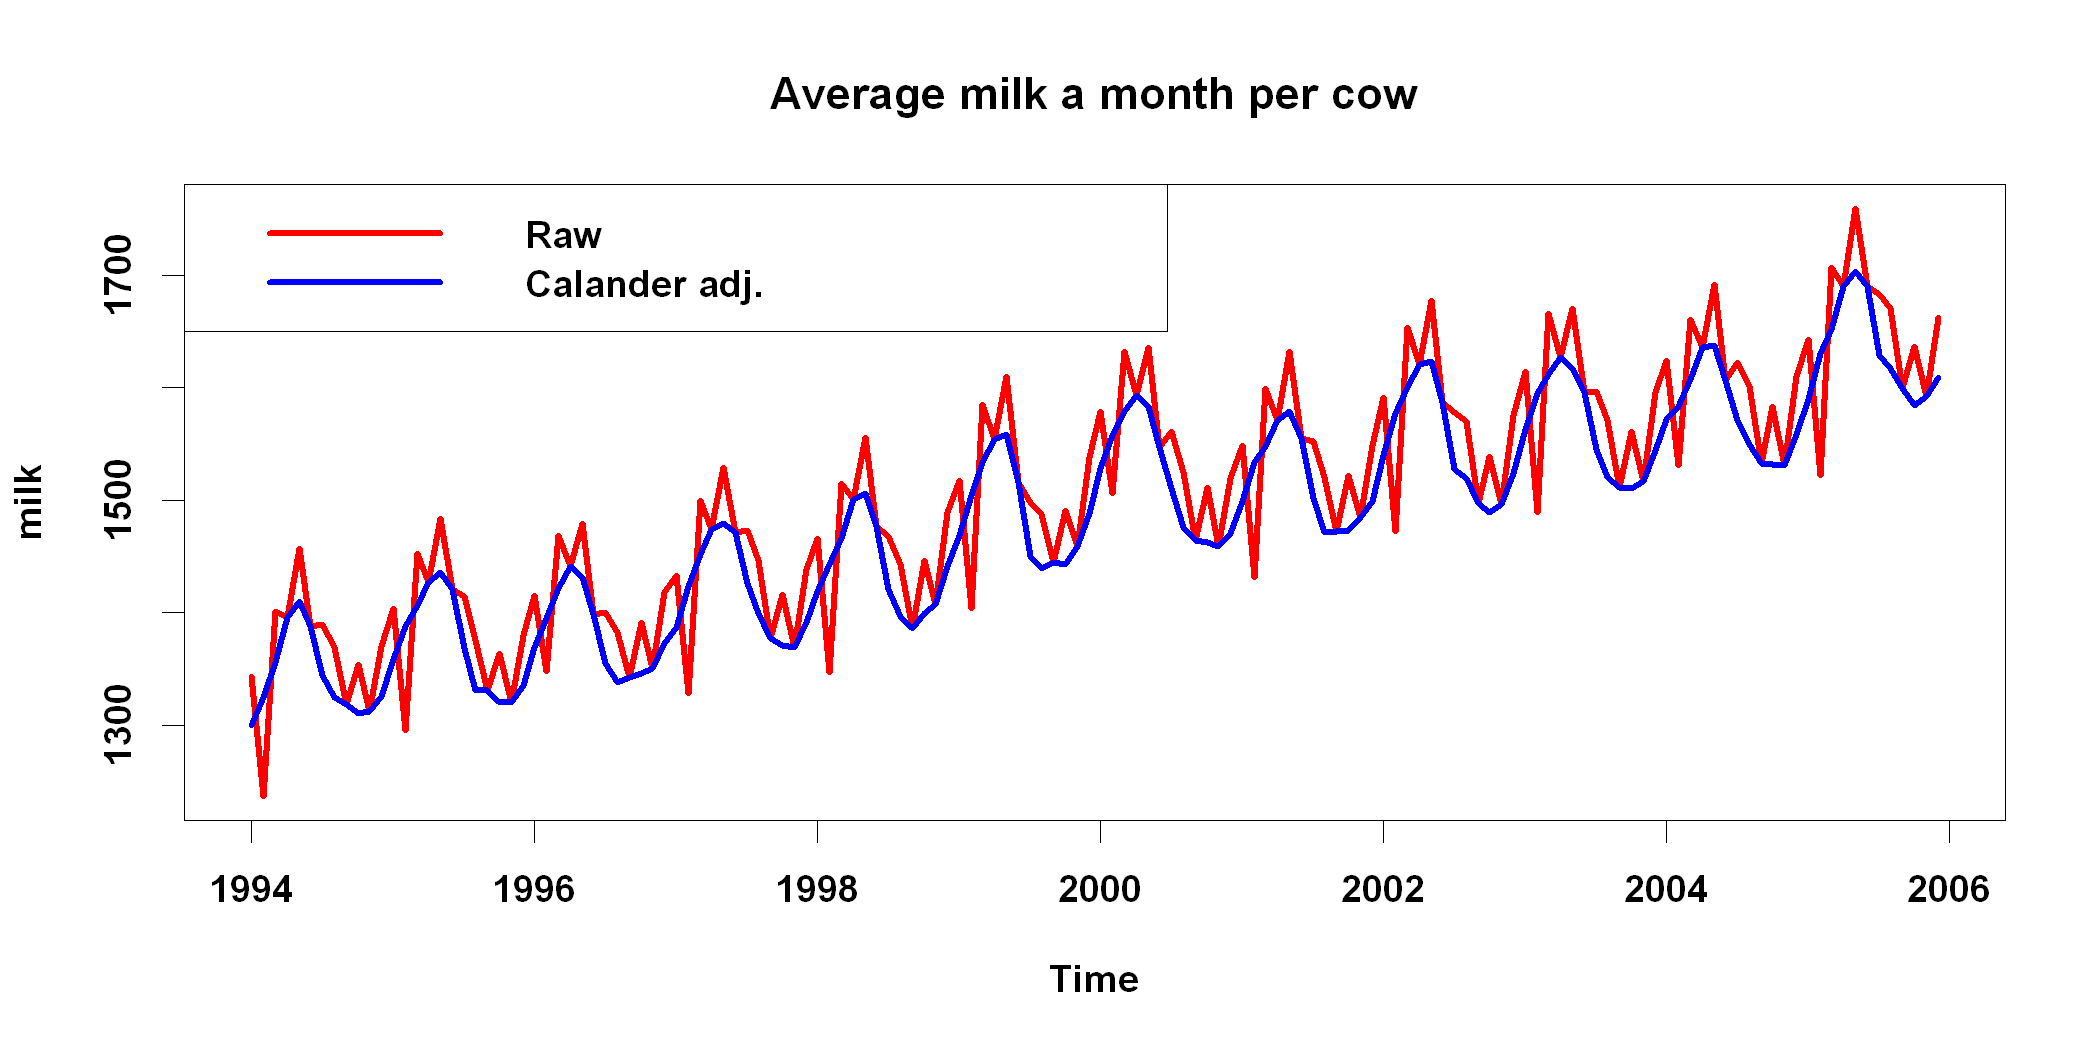

In [40]:
# library(TSA);data("milk")
daysPerM <- unname(days_in_month(as.Date(as.yearmon(time(milk)))))
milk_t = milk*30/daysPerM
par(cex = 1.5,font.main=2,font.axis=2,font.lab=2)
plot(milk,main = "Average milk a month per cow",col="red",lwd=4)
lines(milk_t,main="",col="blue",axes=FALSE,lwd=4)
legend("topleft",legend = c("Raw","Calander adj."),col=c("red","blue"),lwd=4,text.font = 2)


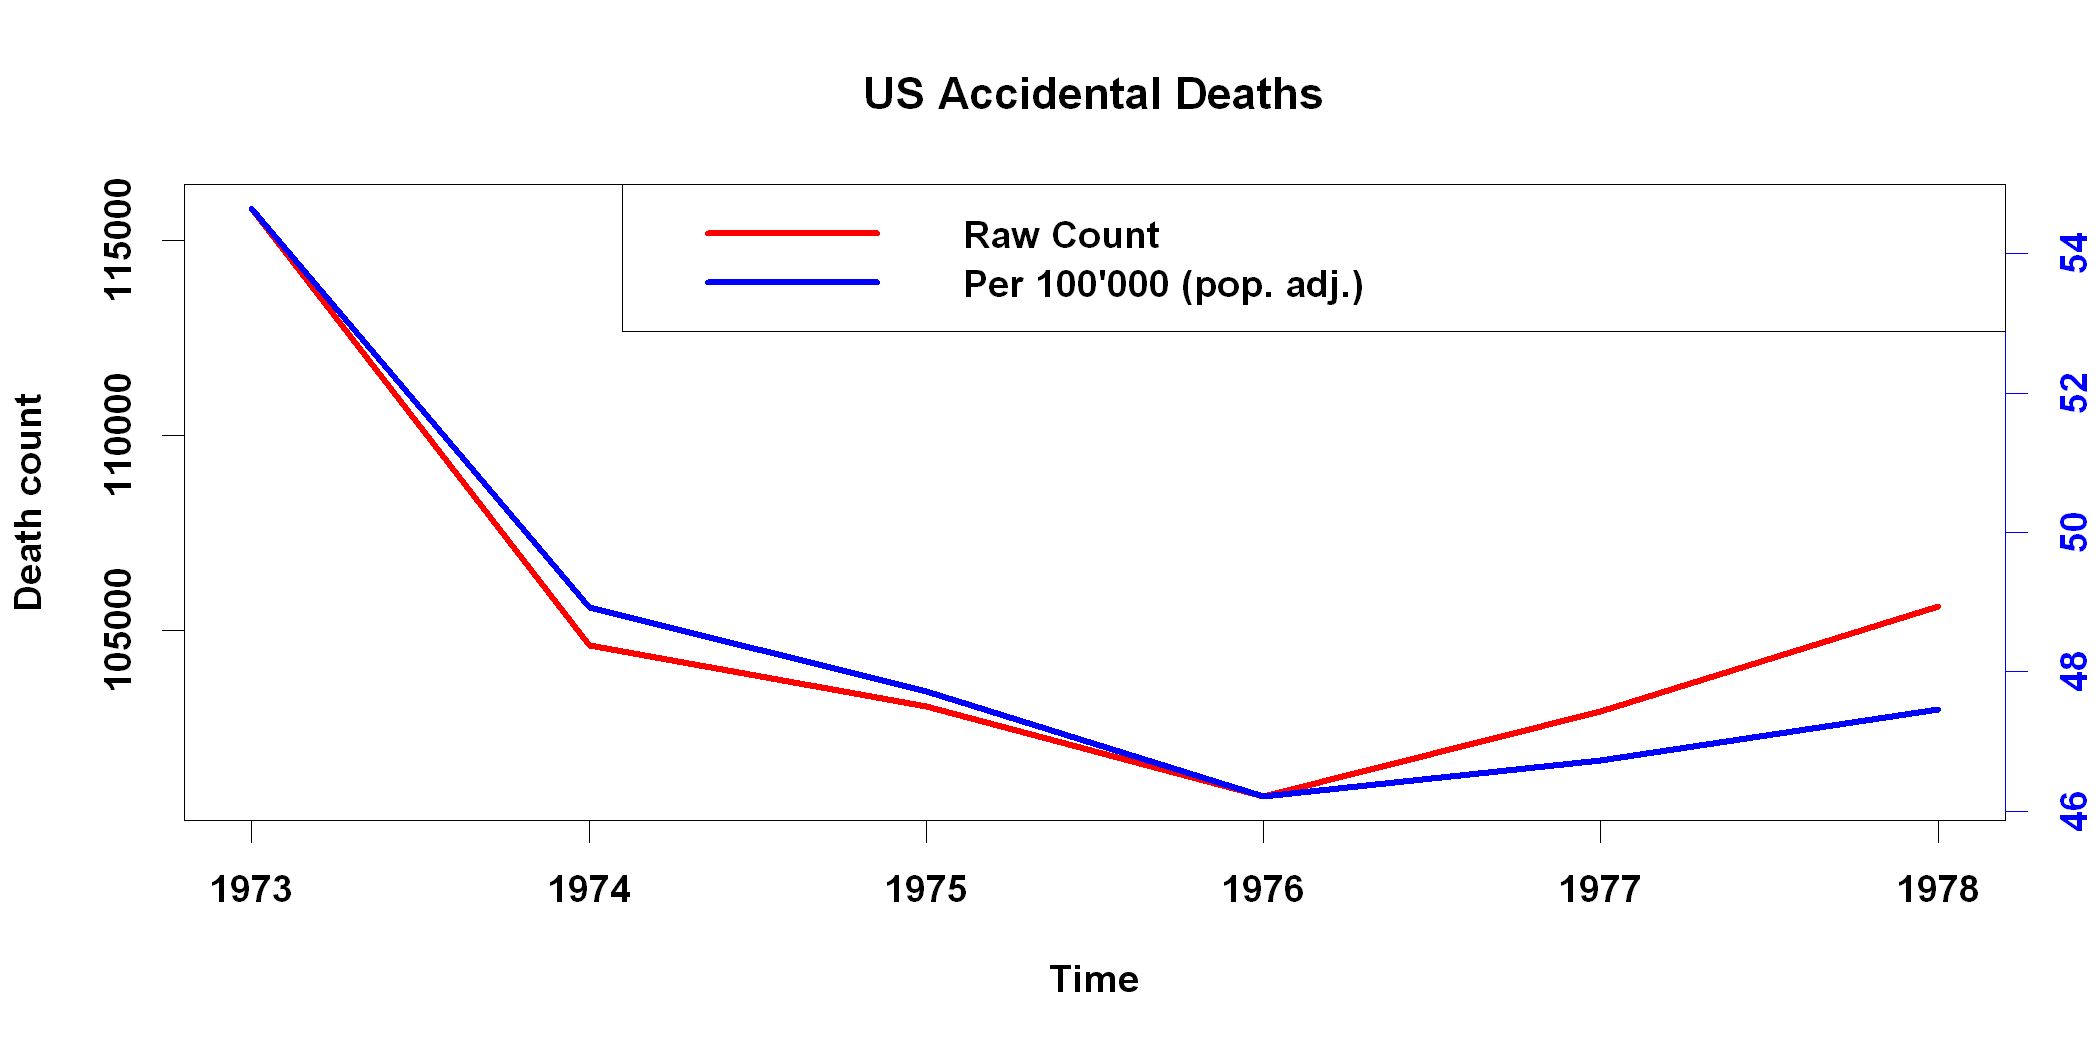

In [ ]:
library(WDI)
data(USAccDeaths);
dead <- aggregate(USAccDeaths,nfrequency = 1,FUN = sum);
df <- WDI("US", "SP.POP.TOTL", start(dead)[1], end(dead)[1])
pop <- ts(rev(df$SP.POP.TOTL),start = start(dead)[1])
rate <- dead/pop * 1e5
par(cex = 1.5,font.main=2,font.axis=2,font.lab=2)
plot(dead,main="US Accidental Deaths",ylab="Death count",lwd=4,col="red")
par(new=TRUE,cex = 1.5,font.main=2,font.axis=2,font.lab=2)
plot(rate,axes=FALSE, ylab="",col="blue",lwd=4)
axis(4, col.axis = "blue", col = "blue")
legend("topright",legend = c("Raw Count","Per 100'000 (pop. adj.)"),col=c("red","blue"),lwd=4,text.font=2)



Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""axes" is not a graphical parameter"


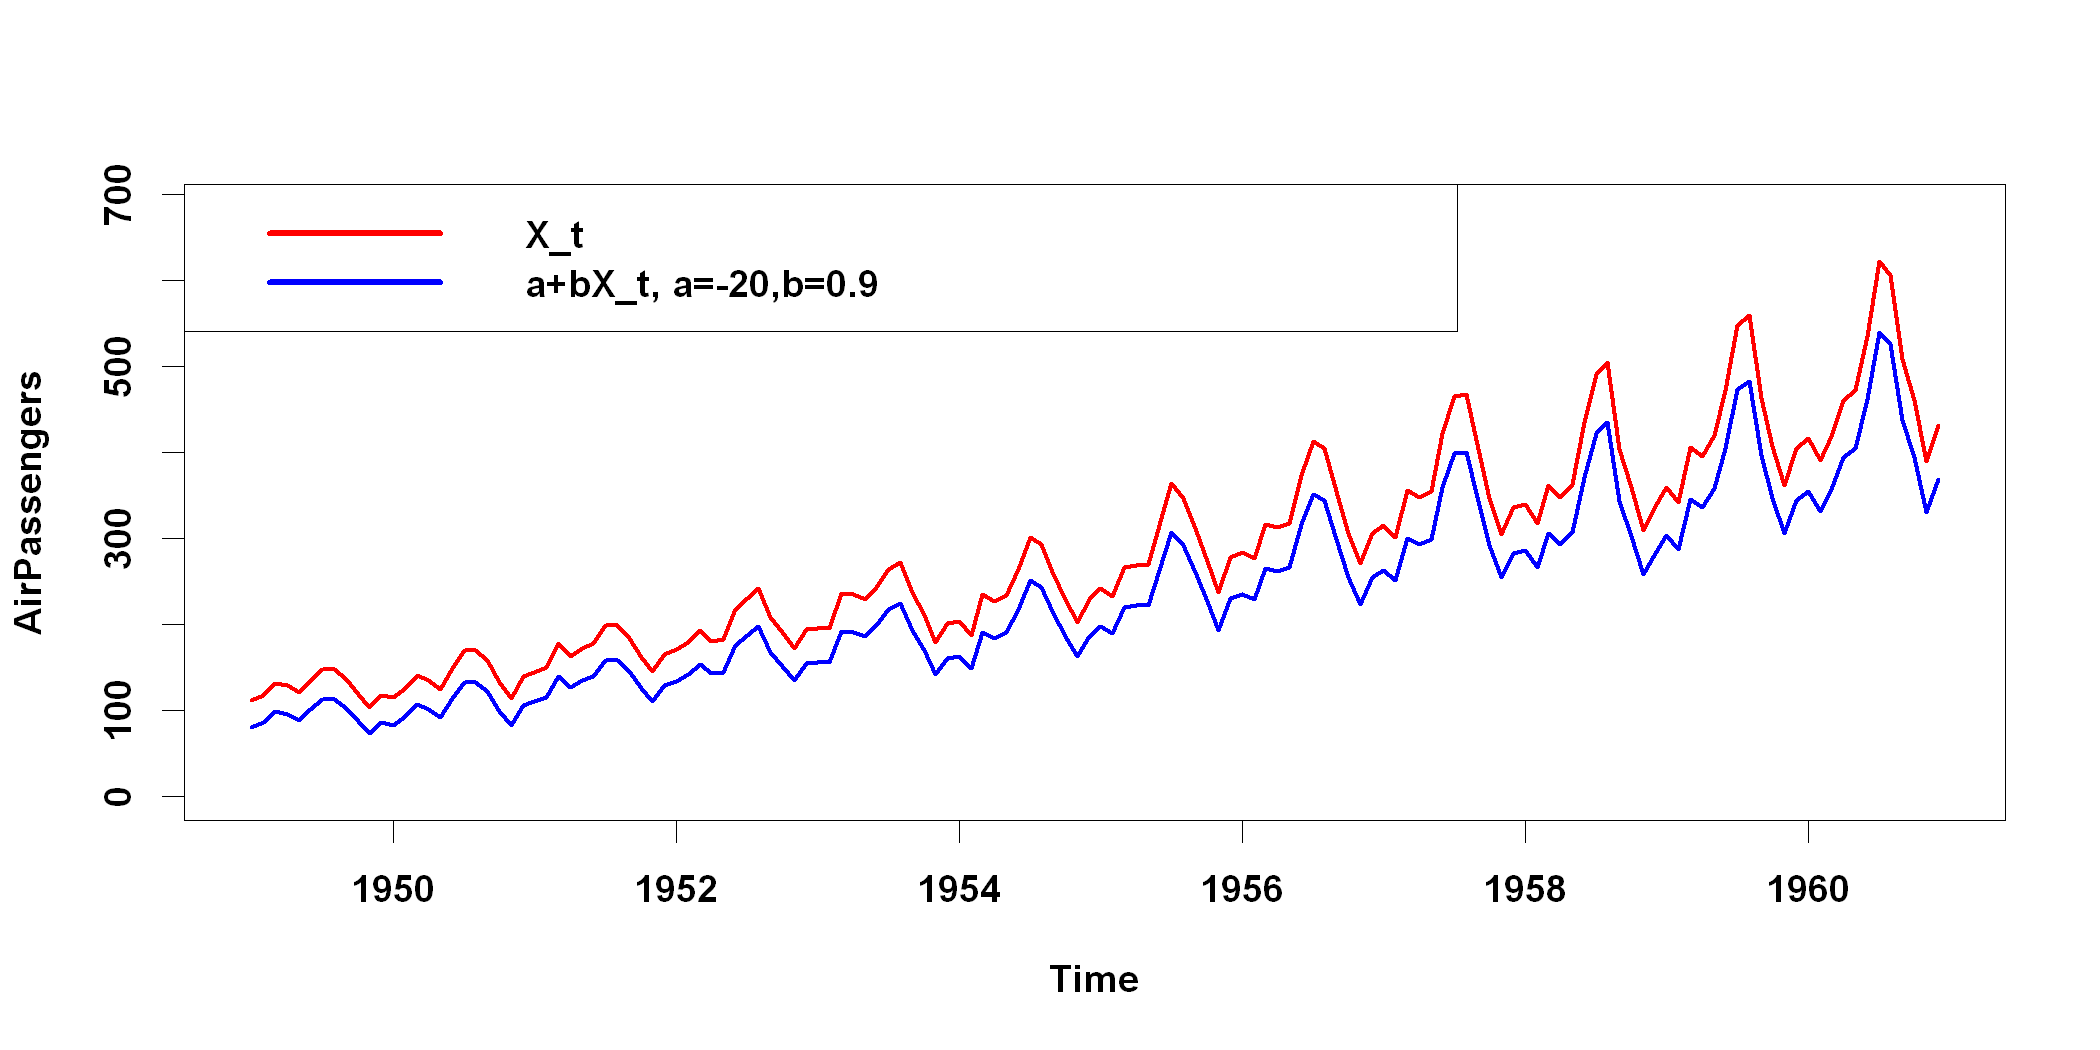

In [107]:
par(cex = 1.5,font.main=2,font.axis=2,font.lab=2)
plot(AirPassengers,col='red',lwd=3,ylim=c(0,max(AirPassengers)*1.1))
a = -20
b = 0.9
lines(AirPassengers*b+a,col="blue",axes=FALSE,ylab="",xlab="",lwd=3)
legend("topleft",legend = c("X_t","a+bX_t, a=-20,b=0.9"),col=c("red","blue"),lwd=4,text.font=2)



# Log-transform?

In [213]:
log_plotted <- function(dta)
{
    par(cex = 1.5,font.main=2,font.axis=2,font.lab=2,lwd = 2)

    plot(dta,  main=deparse(substitute(dta)),ylab= deparse(substitute(dta)))
    par(new=TRUE)
    plot(log(dta),axes=FALSE,ylab = "", xlab="",main="",lty=2)
    axis(4)
    legend("topleft",legend = c("Raw","Log"),lty=c(1,2),lwd=4,text.font=2)


    par(mfrow = c(1, 2),cex = 1.5,font.main=2,font.axis=2,font.lab=2,lwd = 2)
    hist(dta,main=paste("Histogram", deparse(substitute(dta))),xlab= deparse(substitute(dta)))
    hist(log(dta),main=paste("Histogram", "log(", deparse(substitute(dta)),")"),xlab=paste("log(", deparse(substitute(dta)),")"))
}

plotted <- function(dta)
{
    par(cex = 1.5,font.main=2,font.axis=2,font.lab=2,lwd = 2)

    plot(dta,  main=deparse(substitute(dta)), ylab=deparse(substitute(dta)))

}

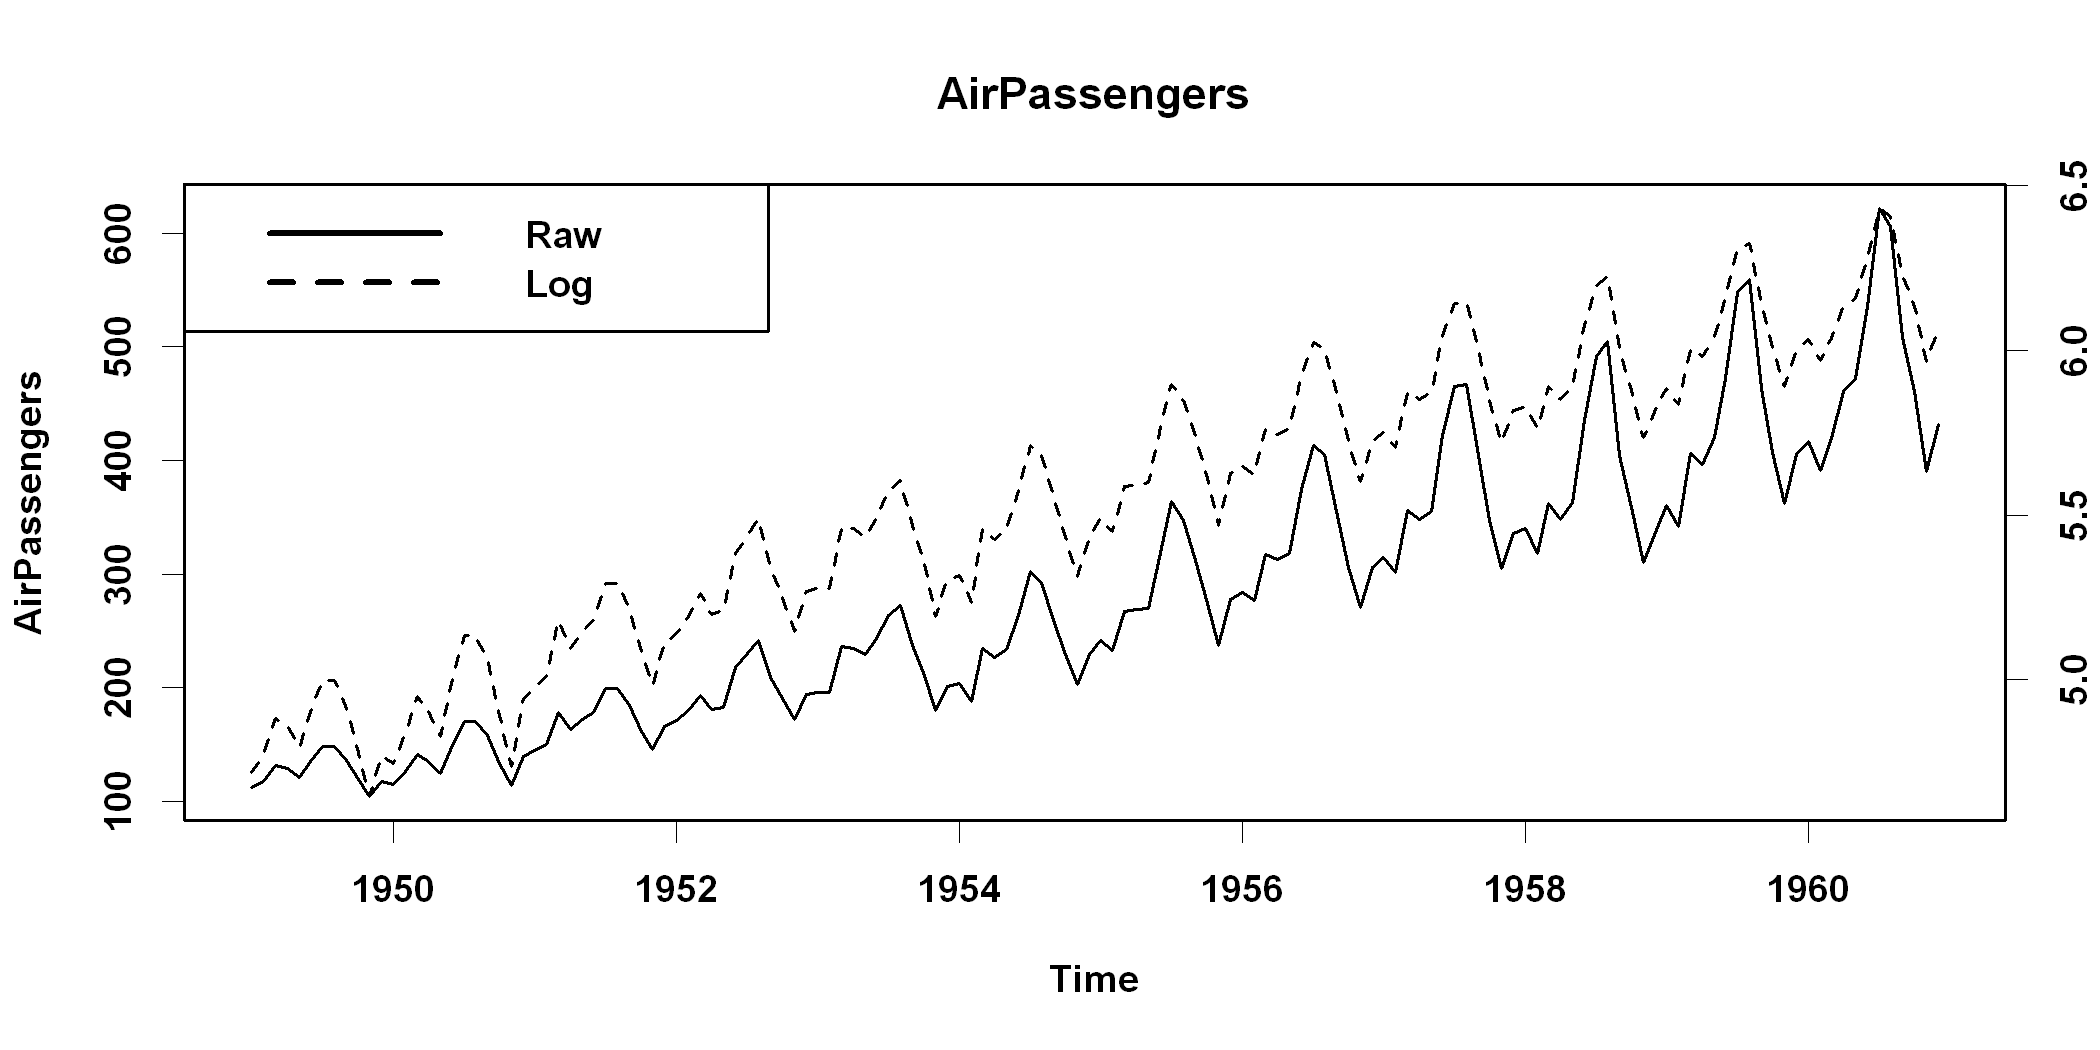

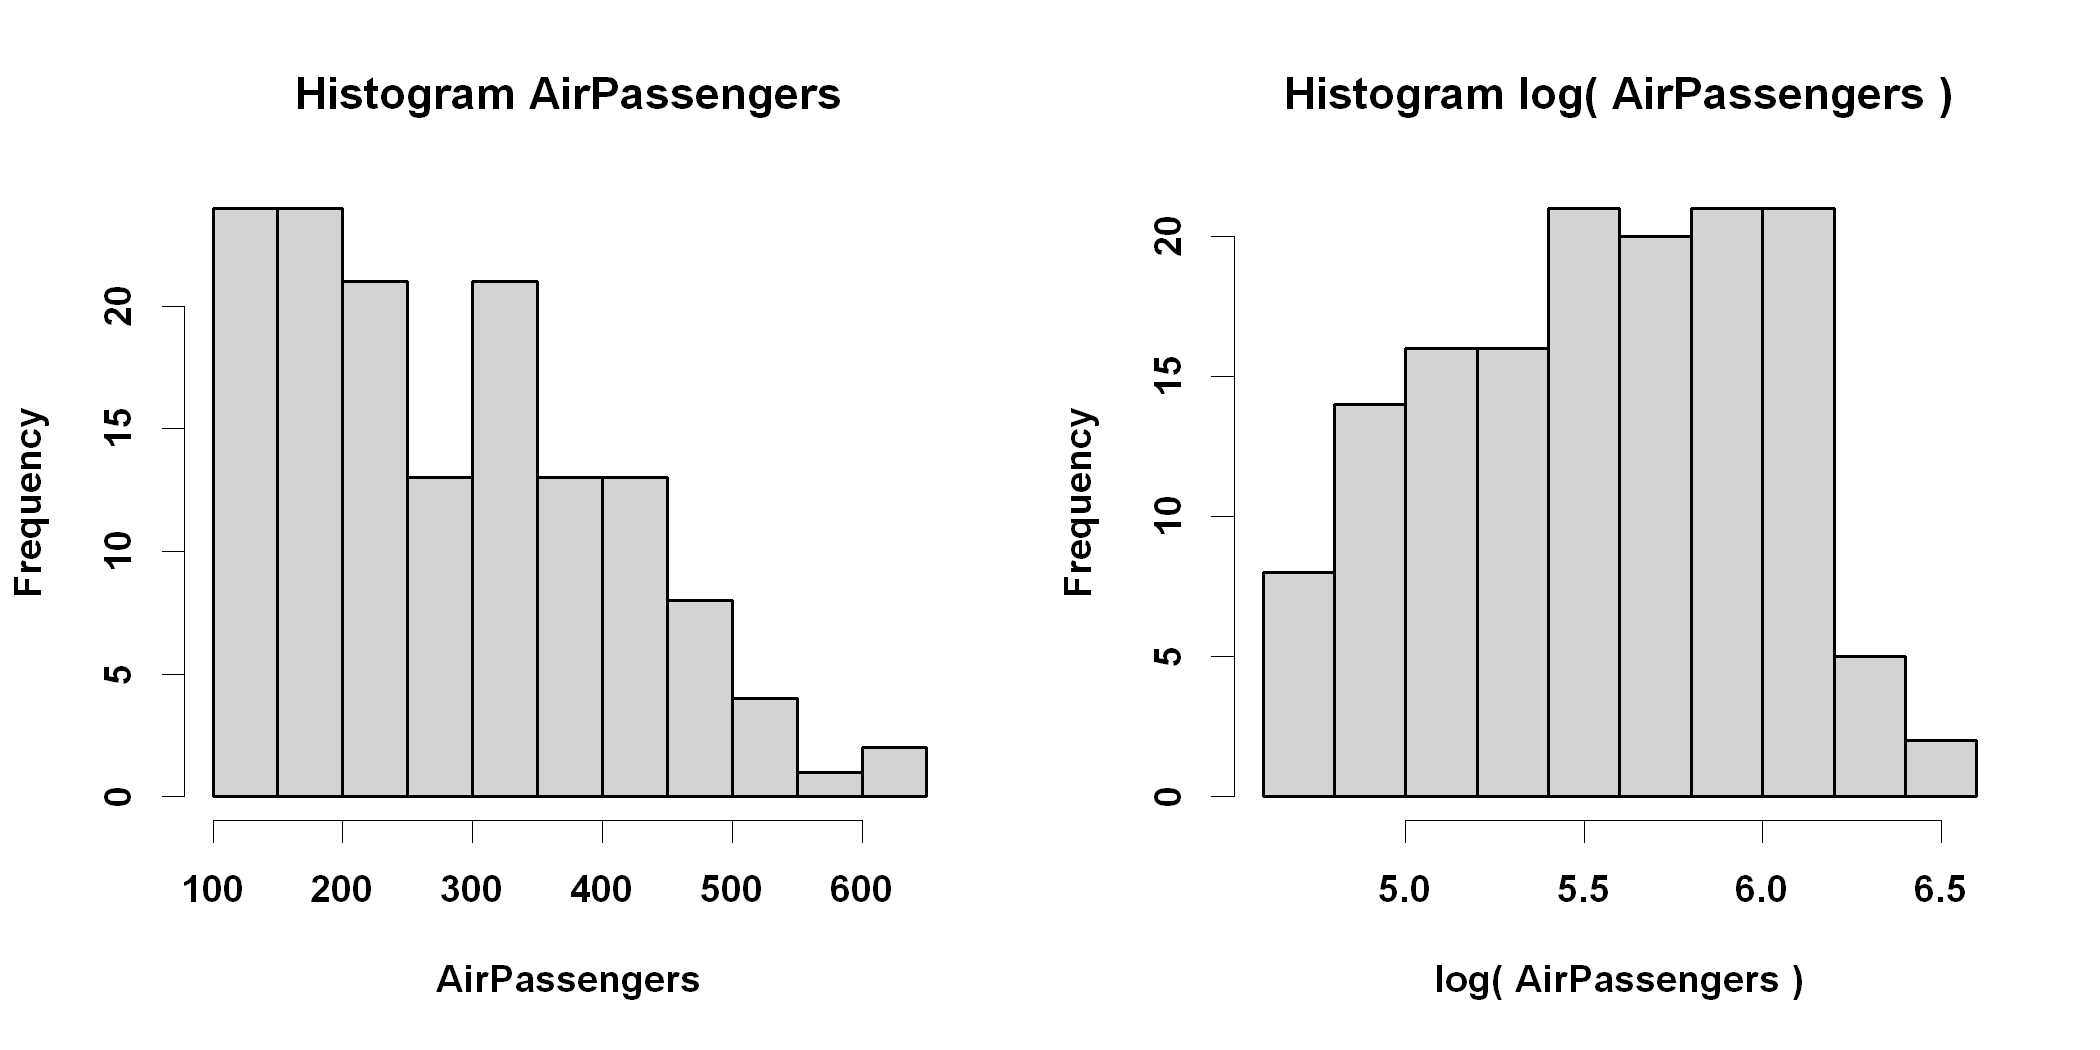

In [211]:
log_plotted(AirPassengers) 


**Yes**, 
* though it does not lead to the acceptence of the of the stationary hypothesis
* it does **solve** the relativity of the scale e.g. from 100 to 200 is much stronger than 500 to 600 (thousand pax)
* the series is technically closed with zero and right open (one cannot have negative passengers)
* the underlying margininal distribution is right-skewed

Notably thought other transformations might be better suited!


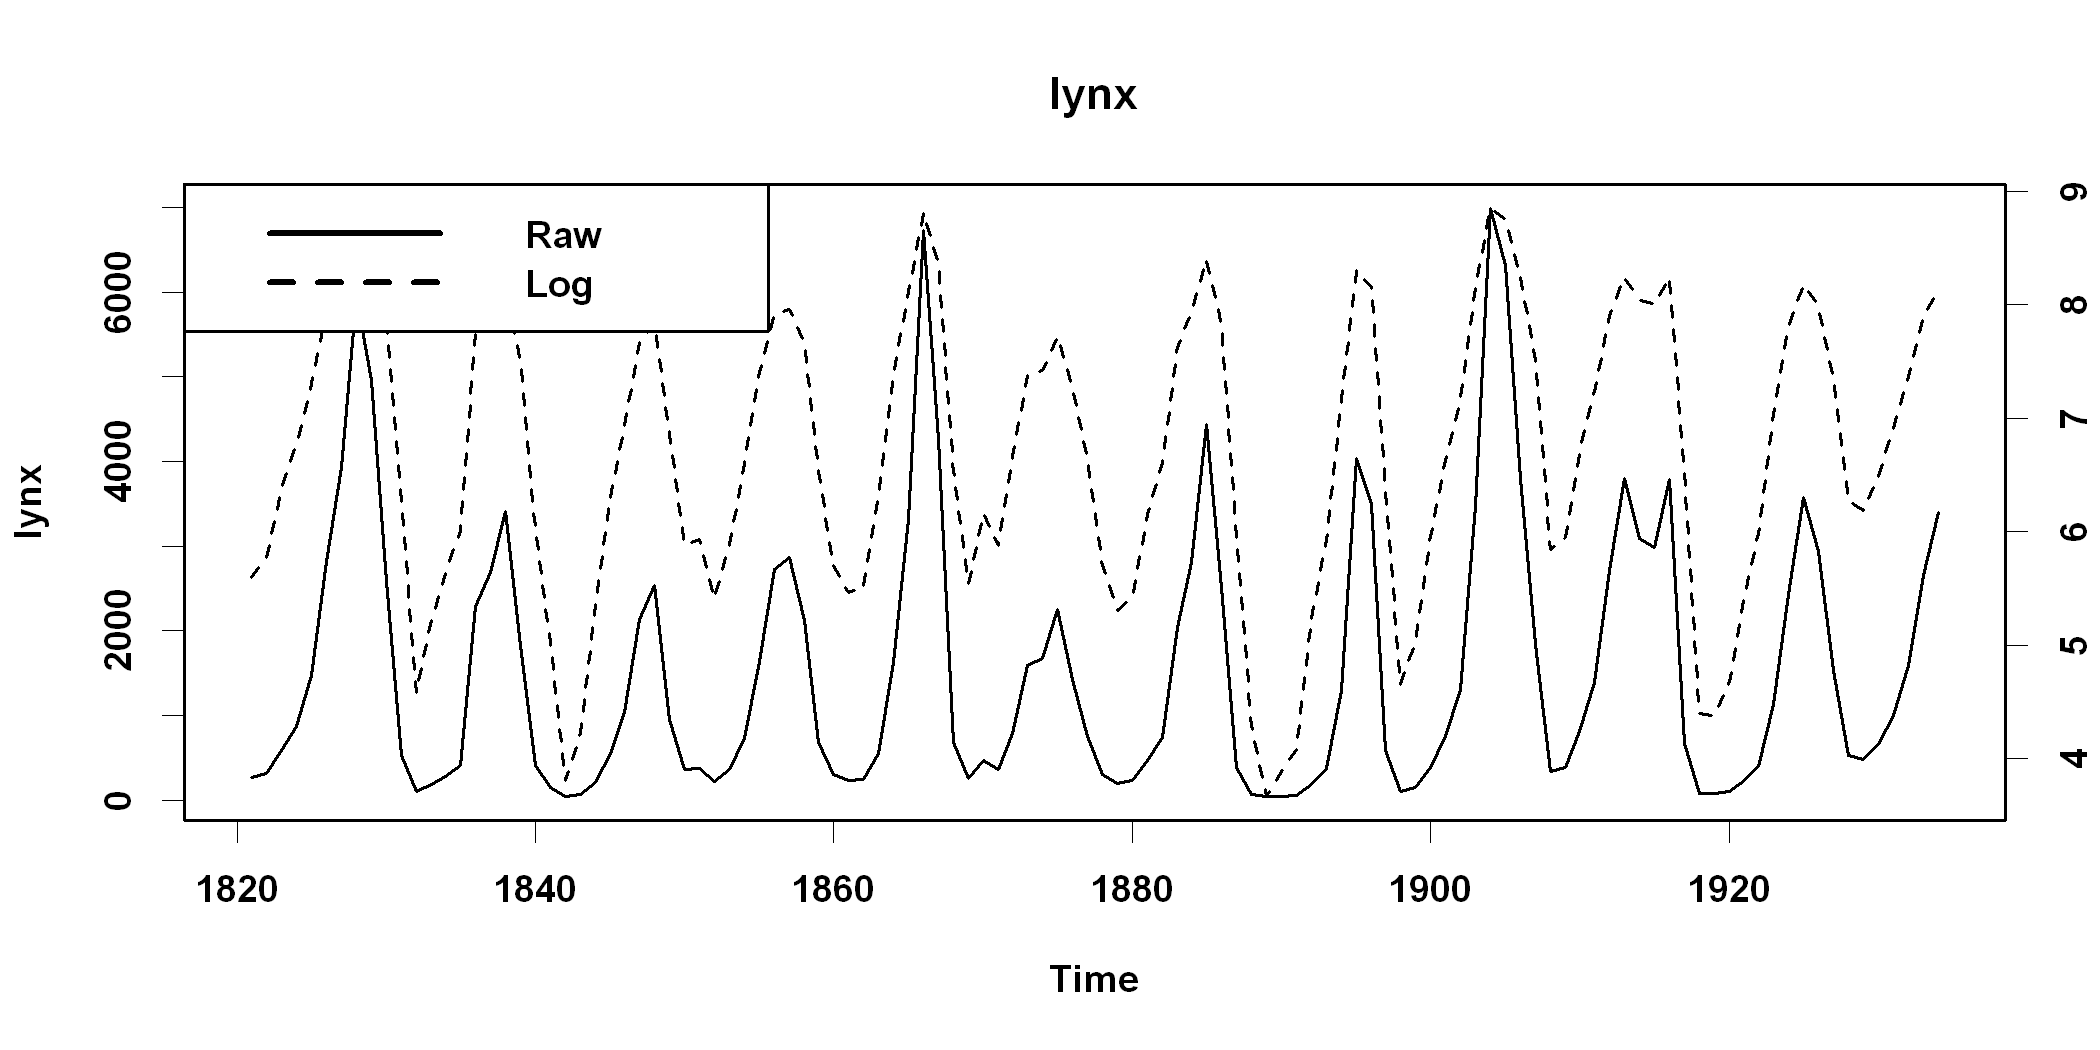

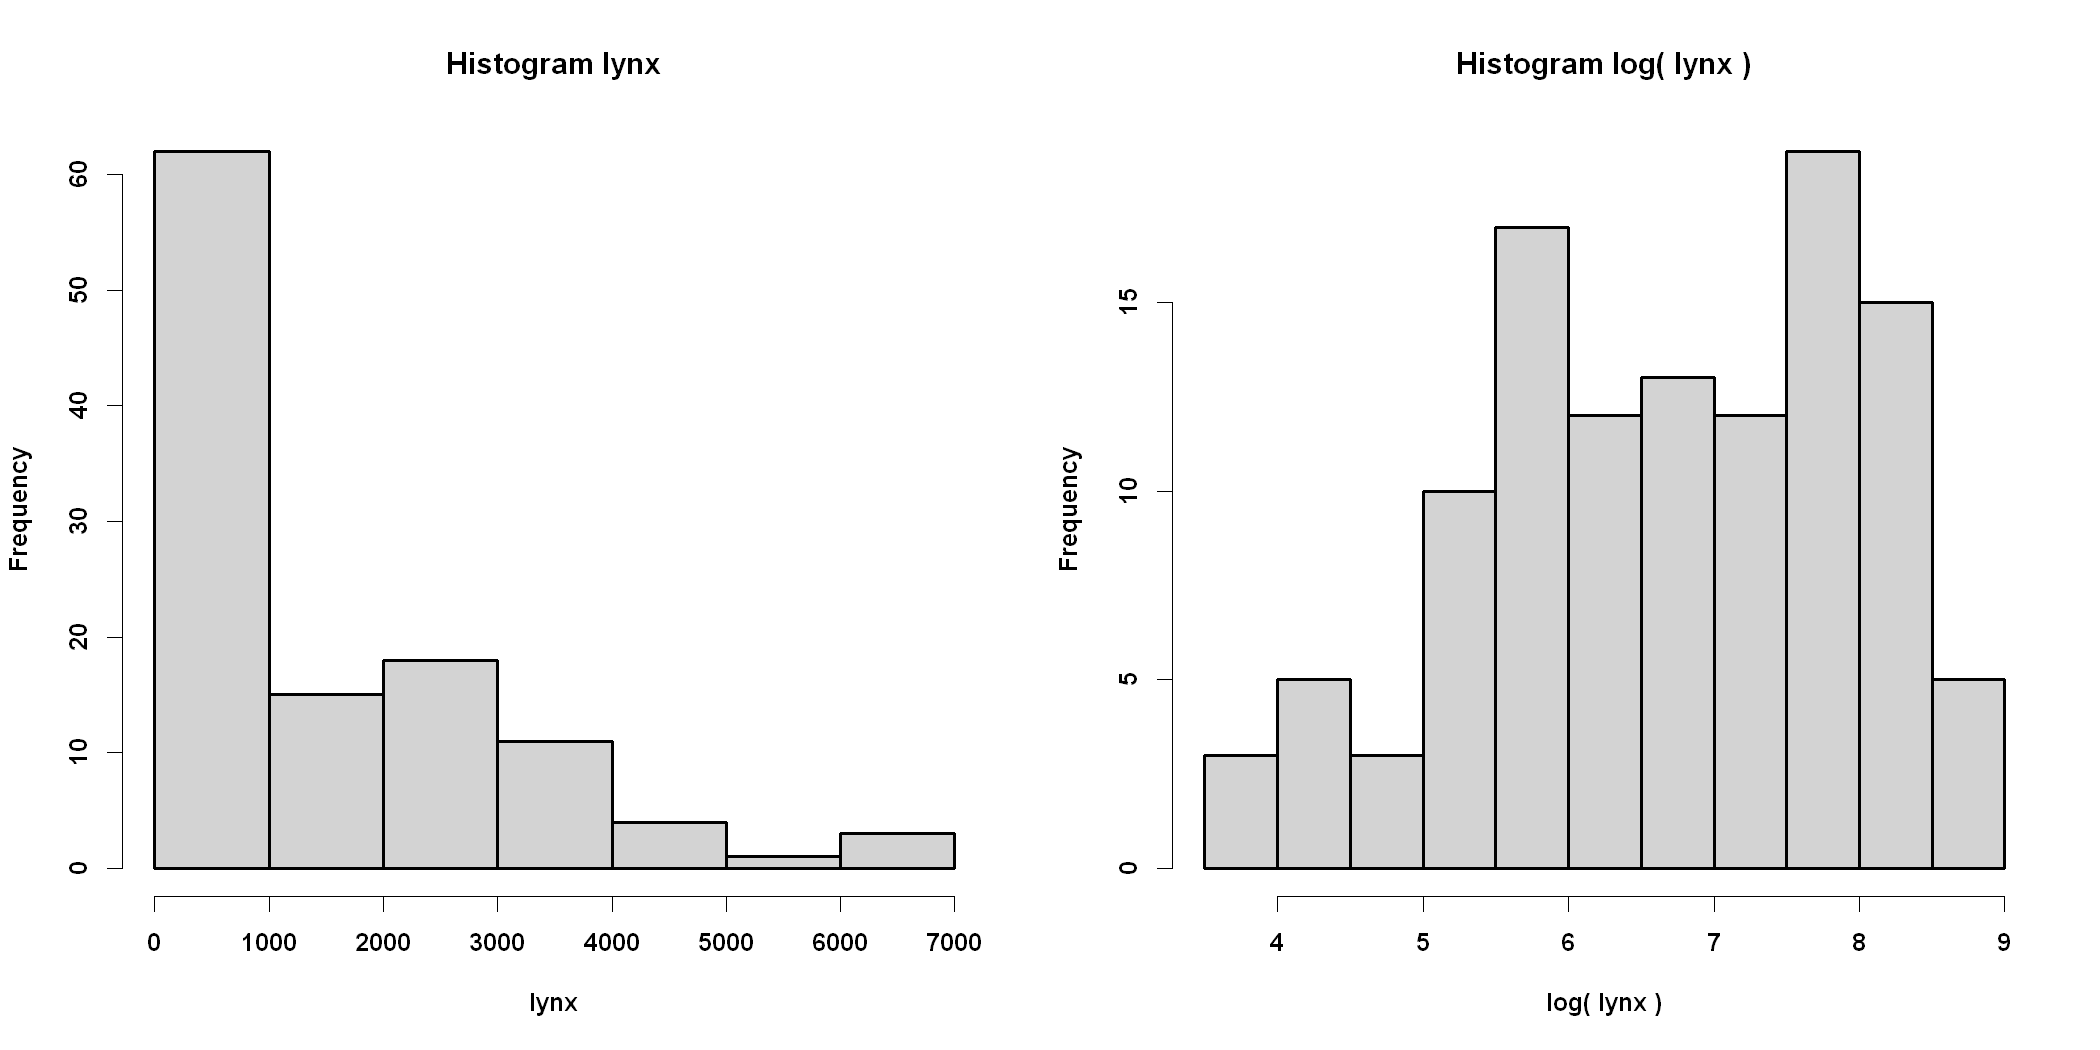

In [203]:
log_plotted(lynx) 

**Yes**, 
* though it leads to a **stronger case** for the acceptence of the of the stationary hypothesis
* it does not directly solve the relativity of the scale it is rather redundant from that standpoint
* the series is closed with zero and right open
* the underlying margininal distribution is right-skewed


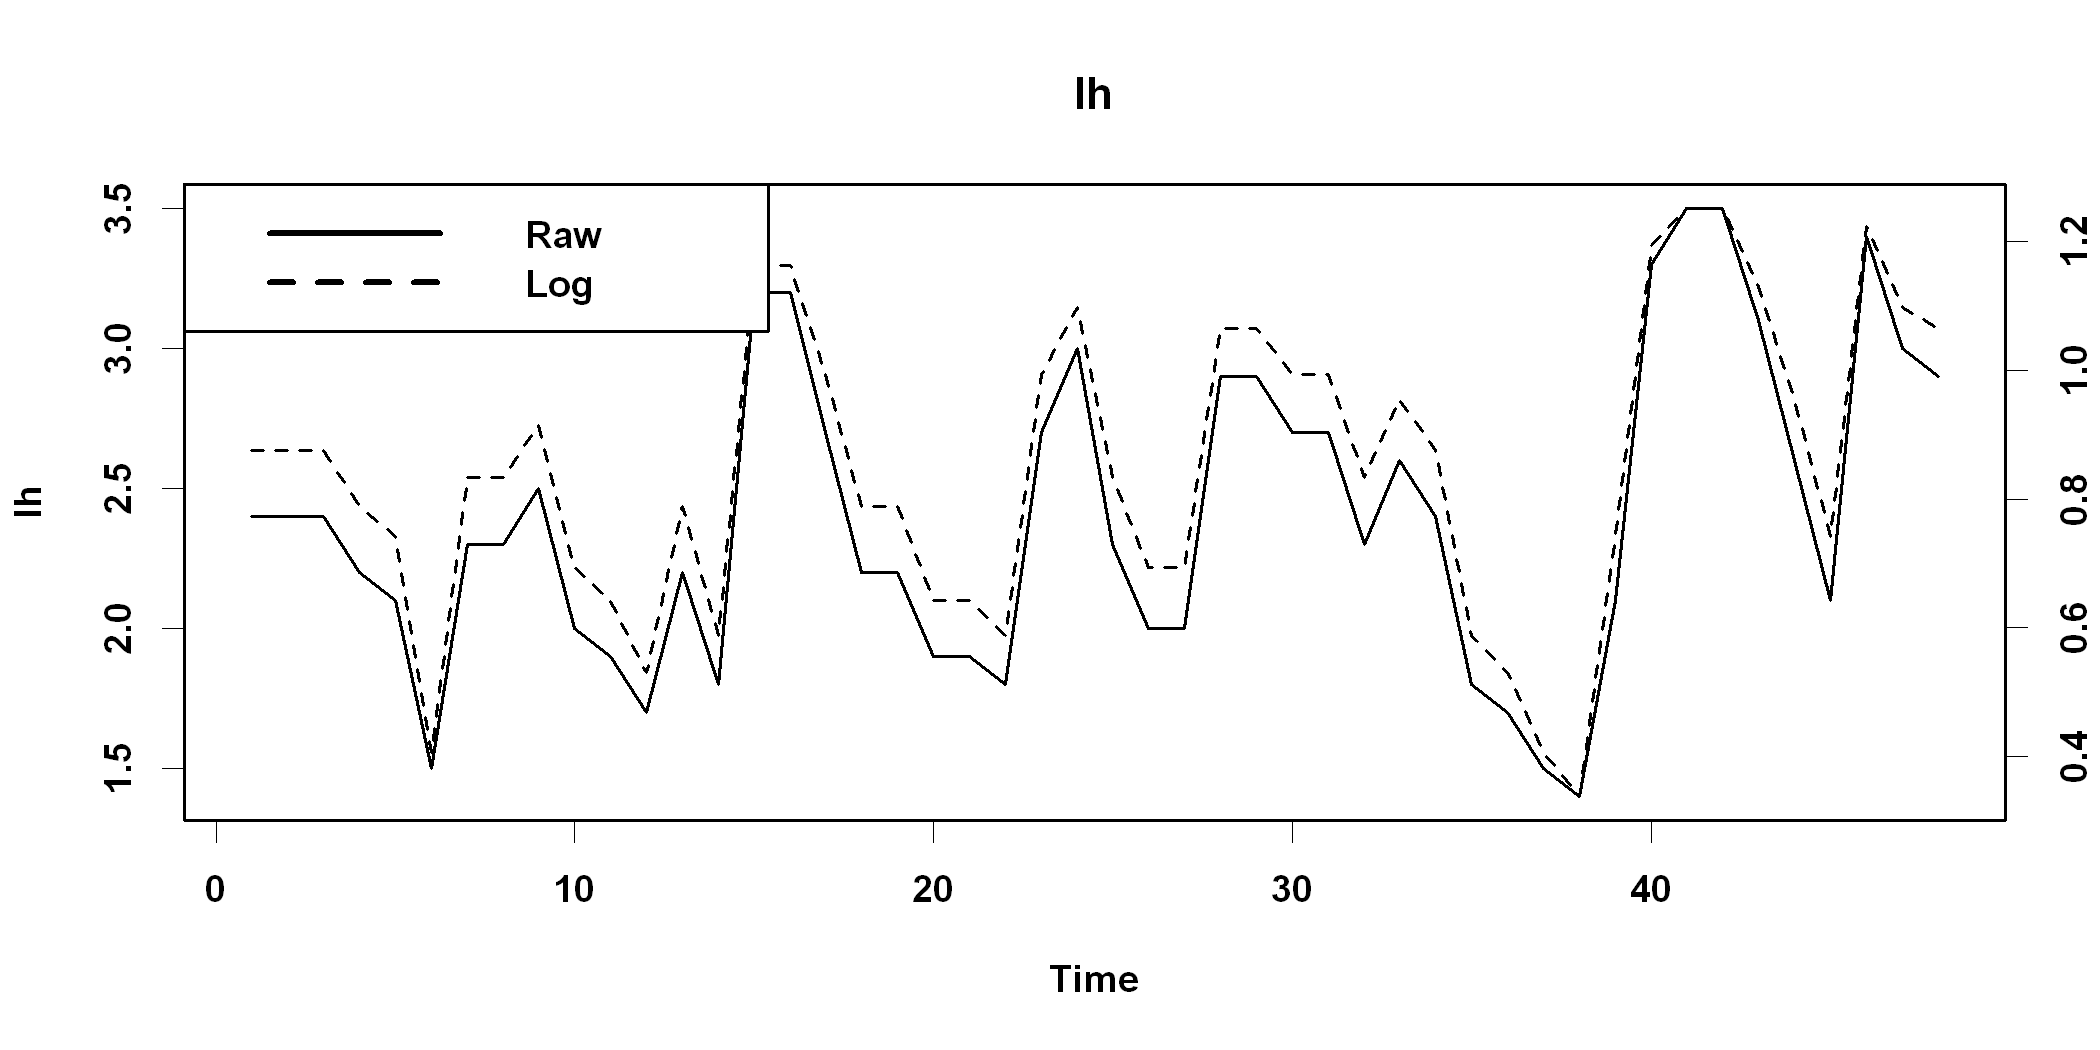

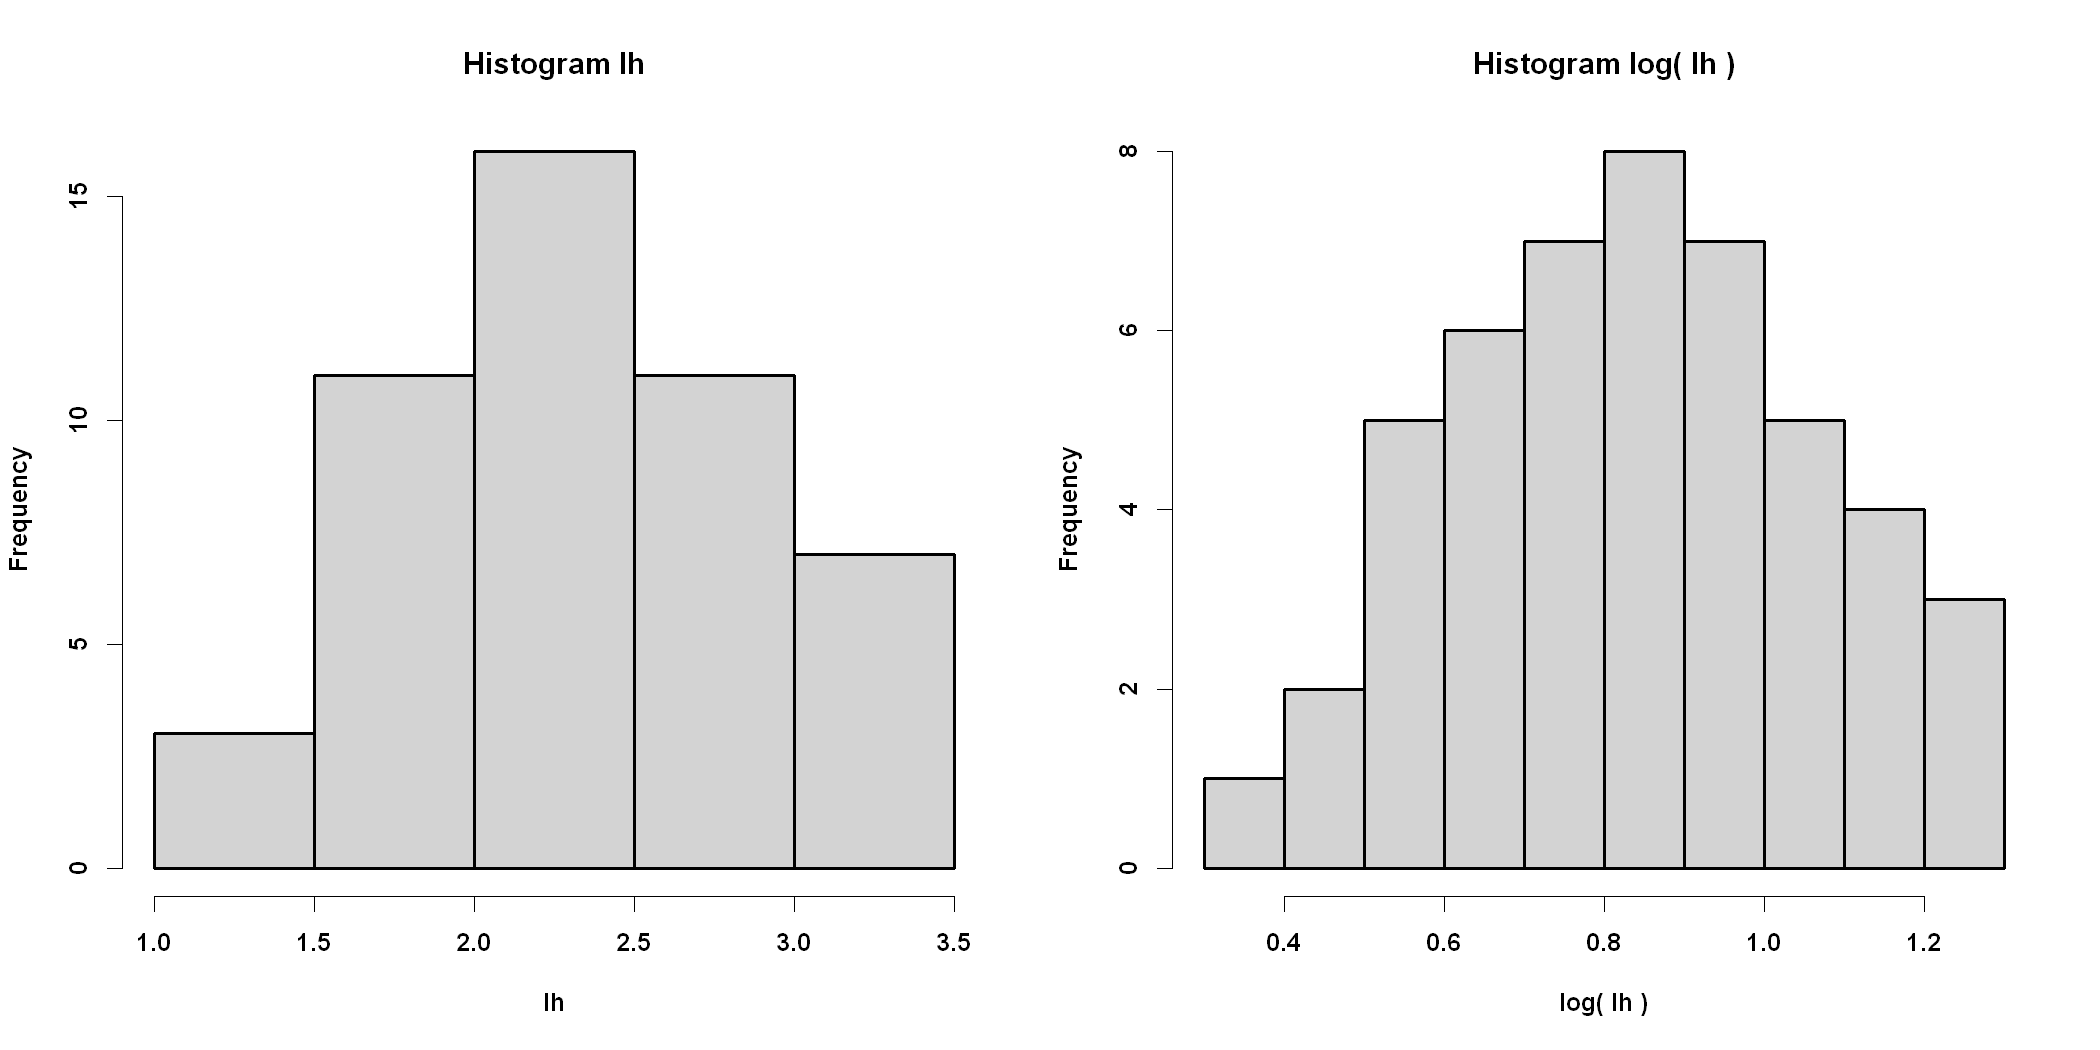

In [204]:
log_plotted(lh)

**No**, 
* it leads does not lead to a stronger case for the acceptence of the of the stationary hypothesis
* it does not directly solve the relativity of the scale it is rather redundant from that standpoint
* the series is not closed with zero and right open
* the underlying margininal distribution is not right-skewed


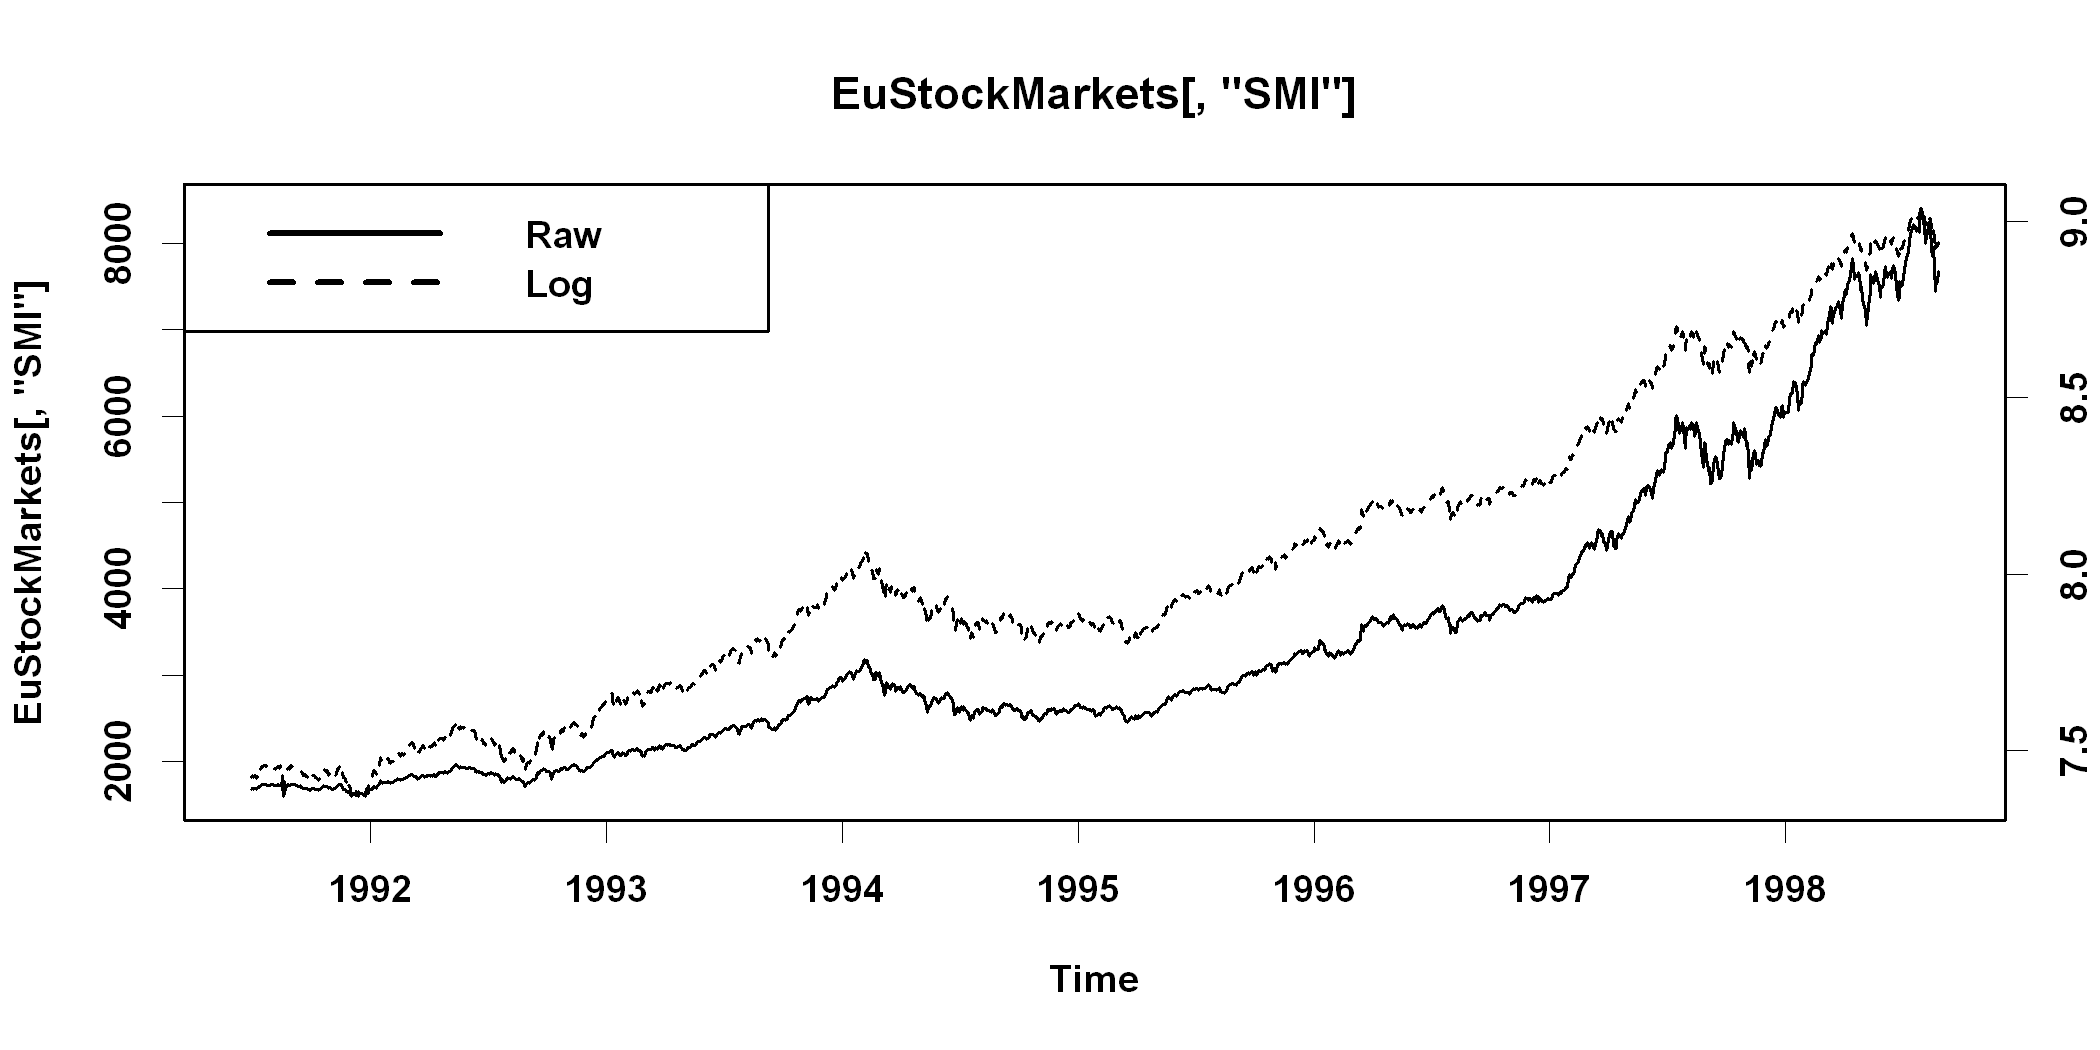

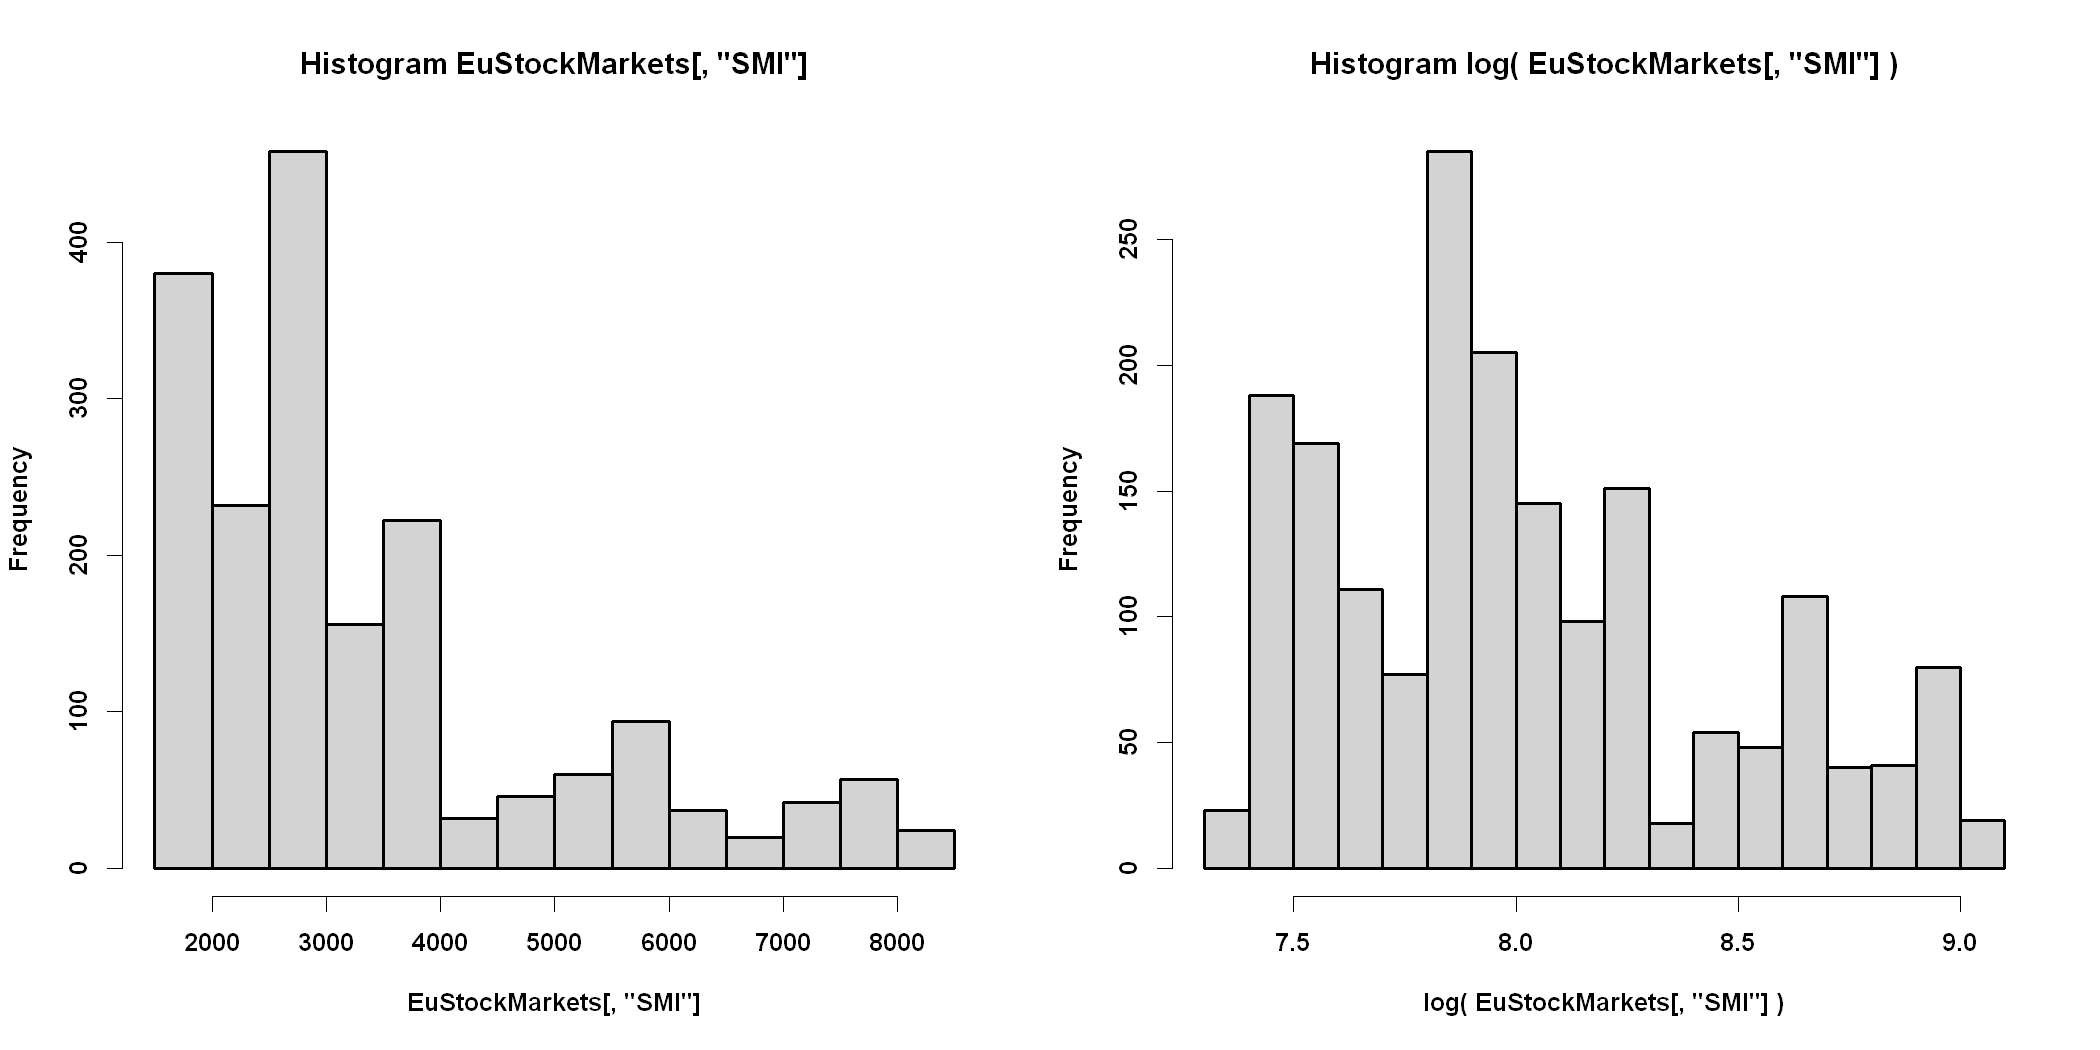

In [205]:
log_plotted(EuStockMarkets[, "SMI"])

**Maybe**, 
* it does not lead to a stronger case for the acceptence of the of the stationary hypothesis
* it does directly solve the relativity of the scale it e.g. 2000 to 400 is a much larger jump than from 4000 to 6000
* the series is not closed with zero and right open
* the underlying margininal distribution is right-skewed

There are much better methods to handle this type of data, e.g. encode the last two observation into one change i.e. the return/growth and then do a logarithmic transformation.


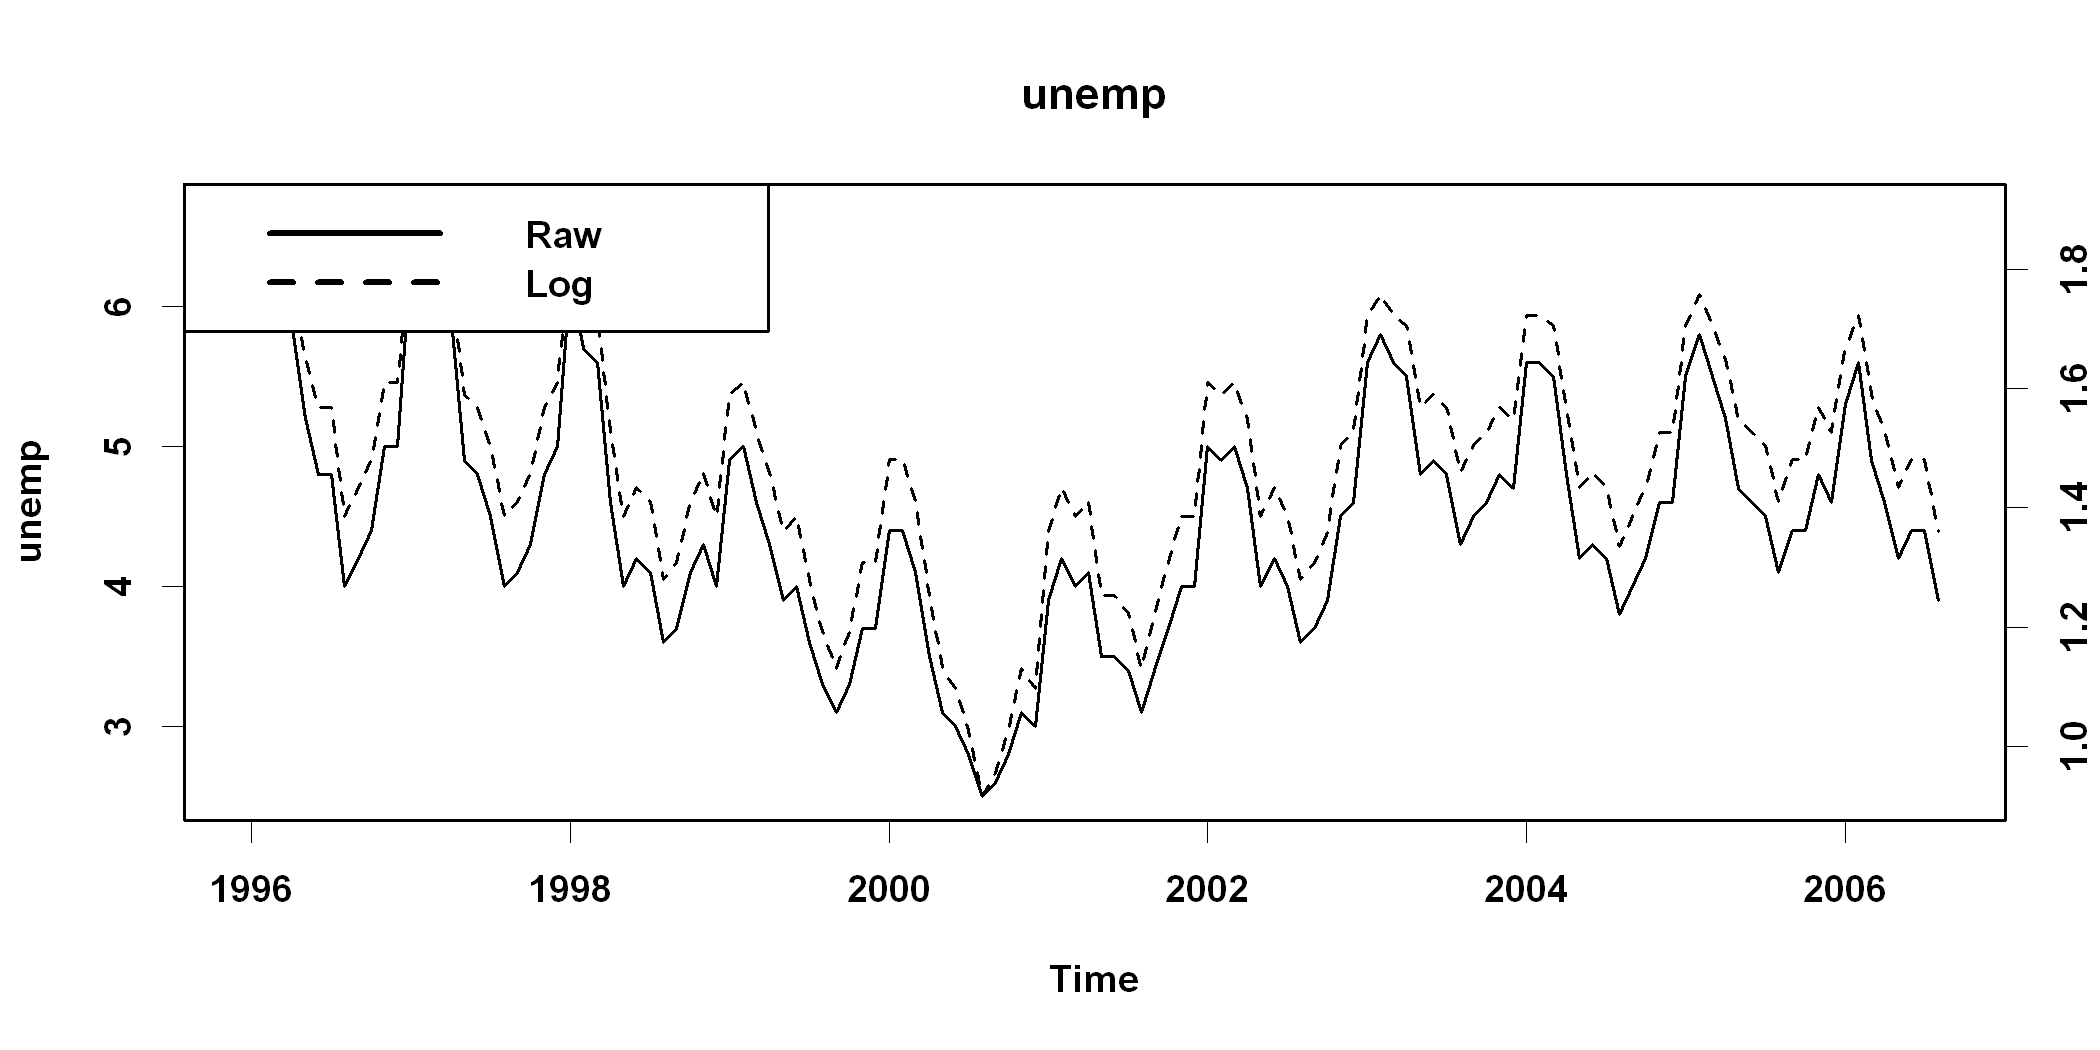

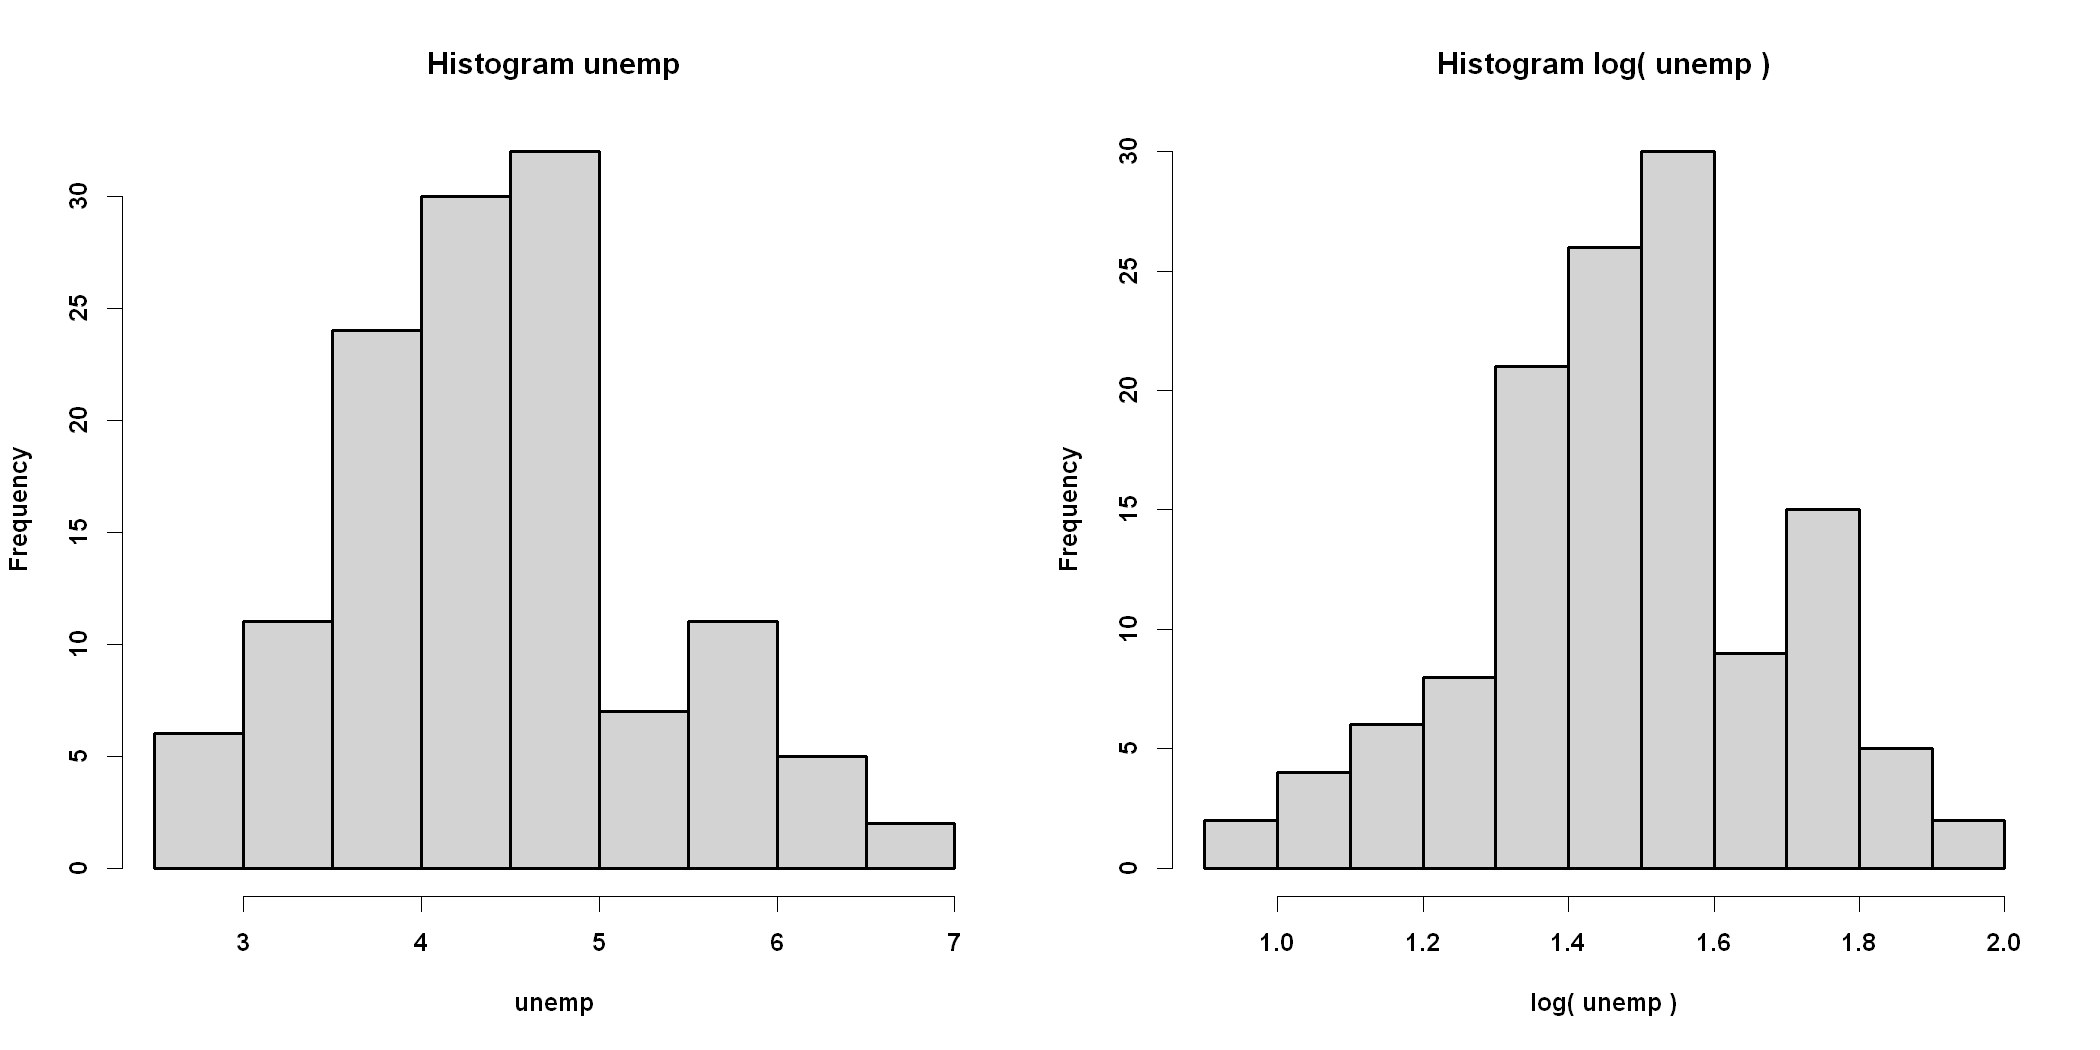

In [206]:
load("unemployment.rda")
log_plotted(unemp)

**No**

(a) the distribution will be symmetric (almost)
(b) it will not be such that is stationary
(c) there is an argument for the relativity of the scale but still there is nothing major about going from 3% to 4% vs 6 to 7 one might even argue the latter is more severe
(d) as a measure it is theoretically bounded from below, but not in this sample

what do you think (I've already come to a conclusion)

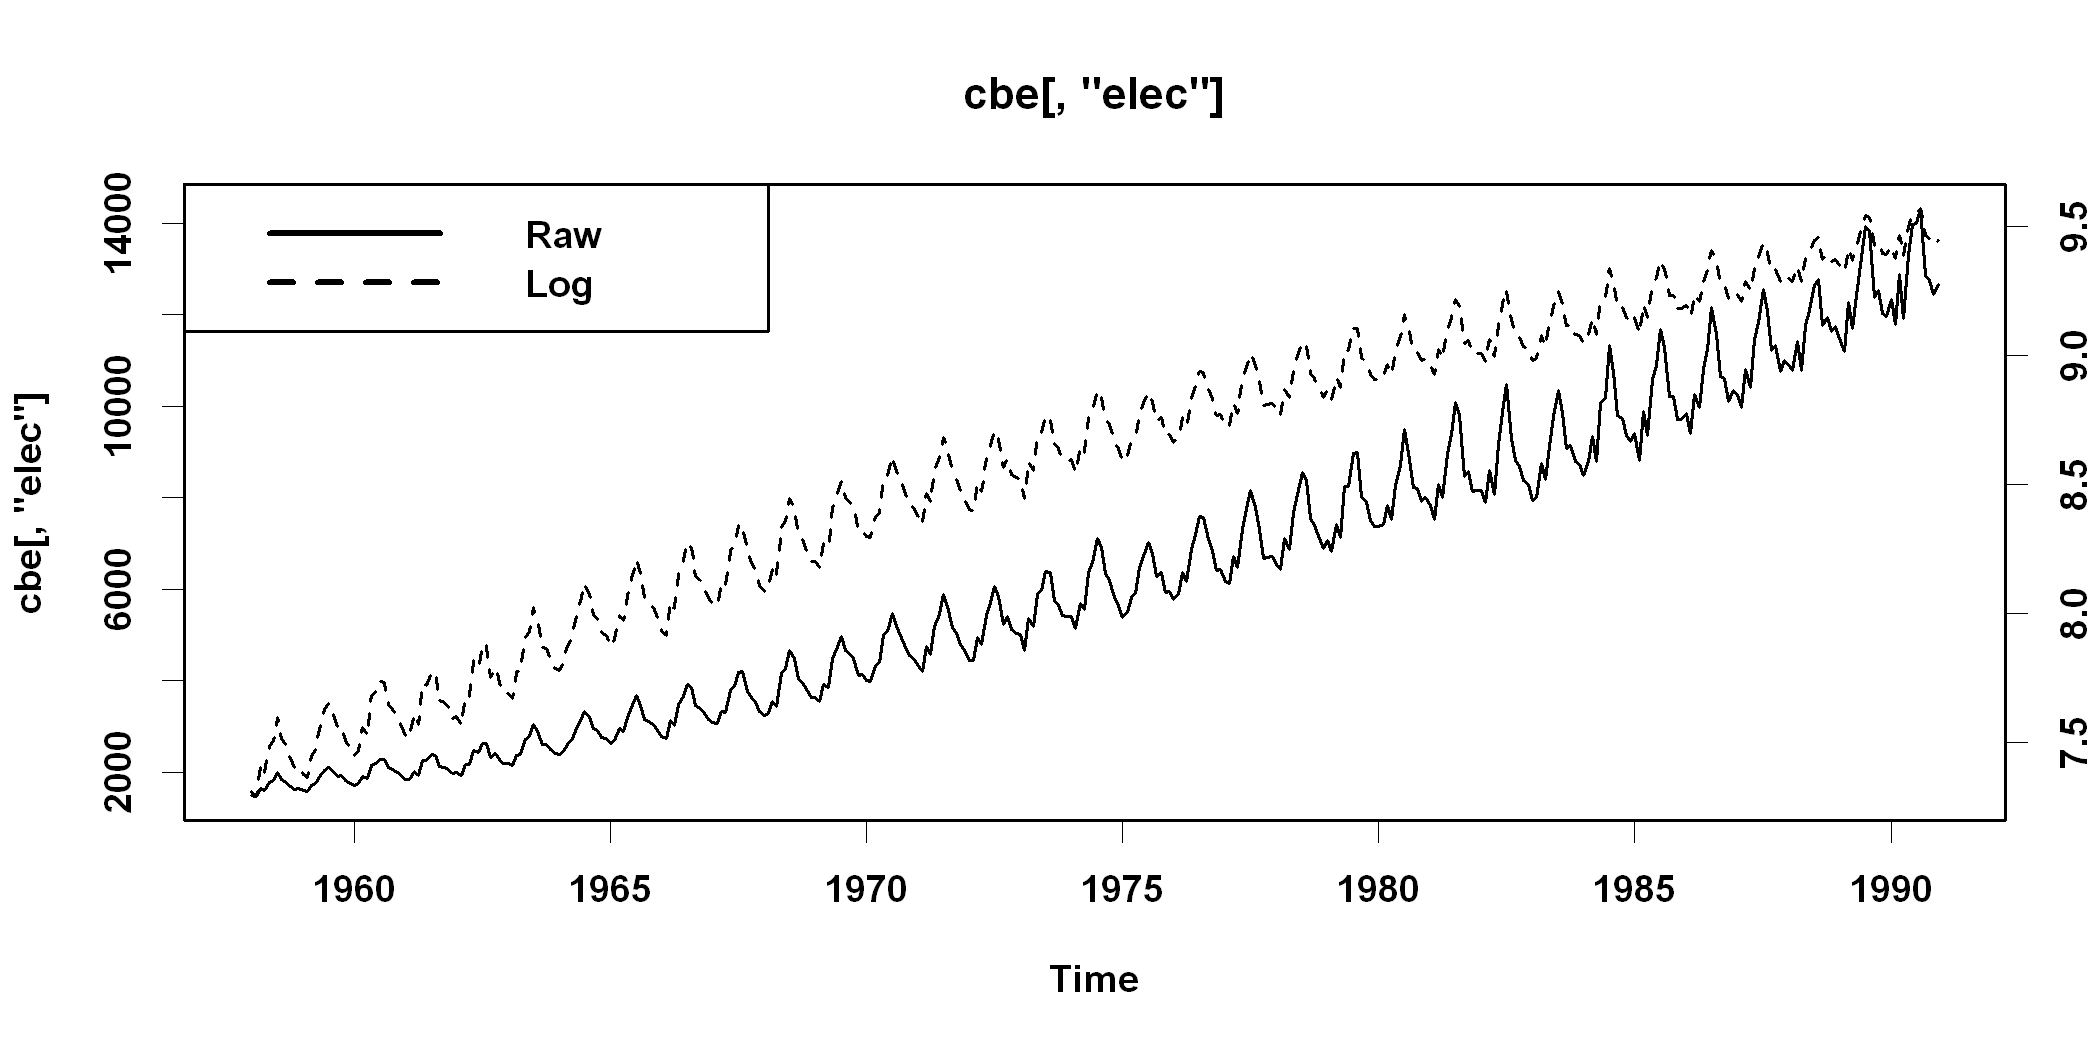

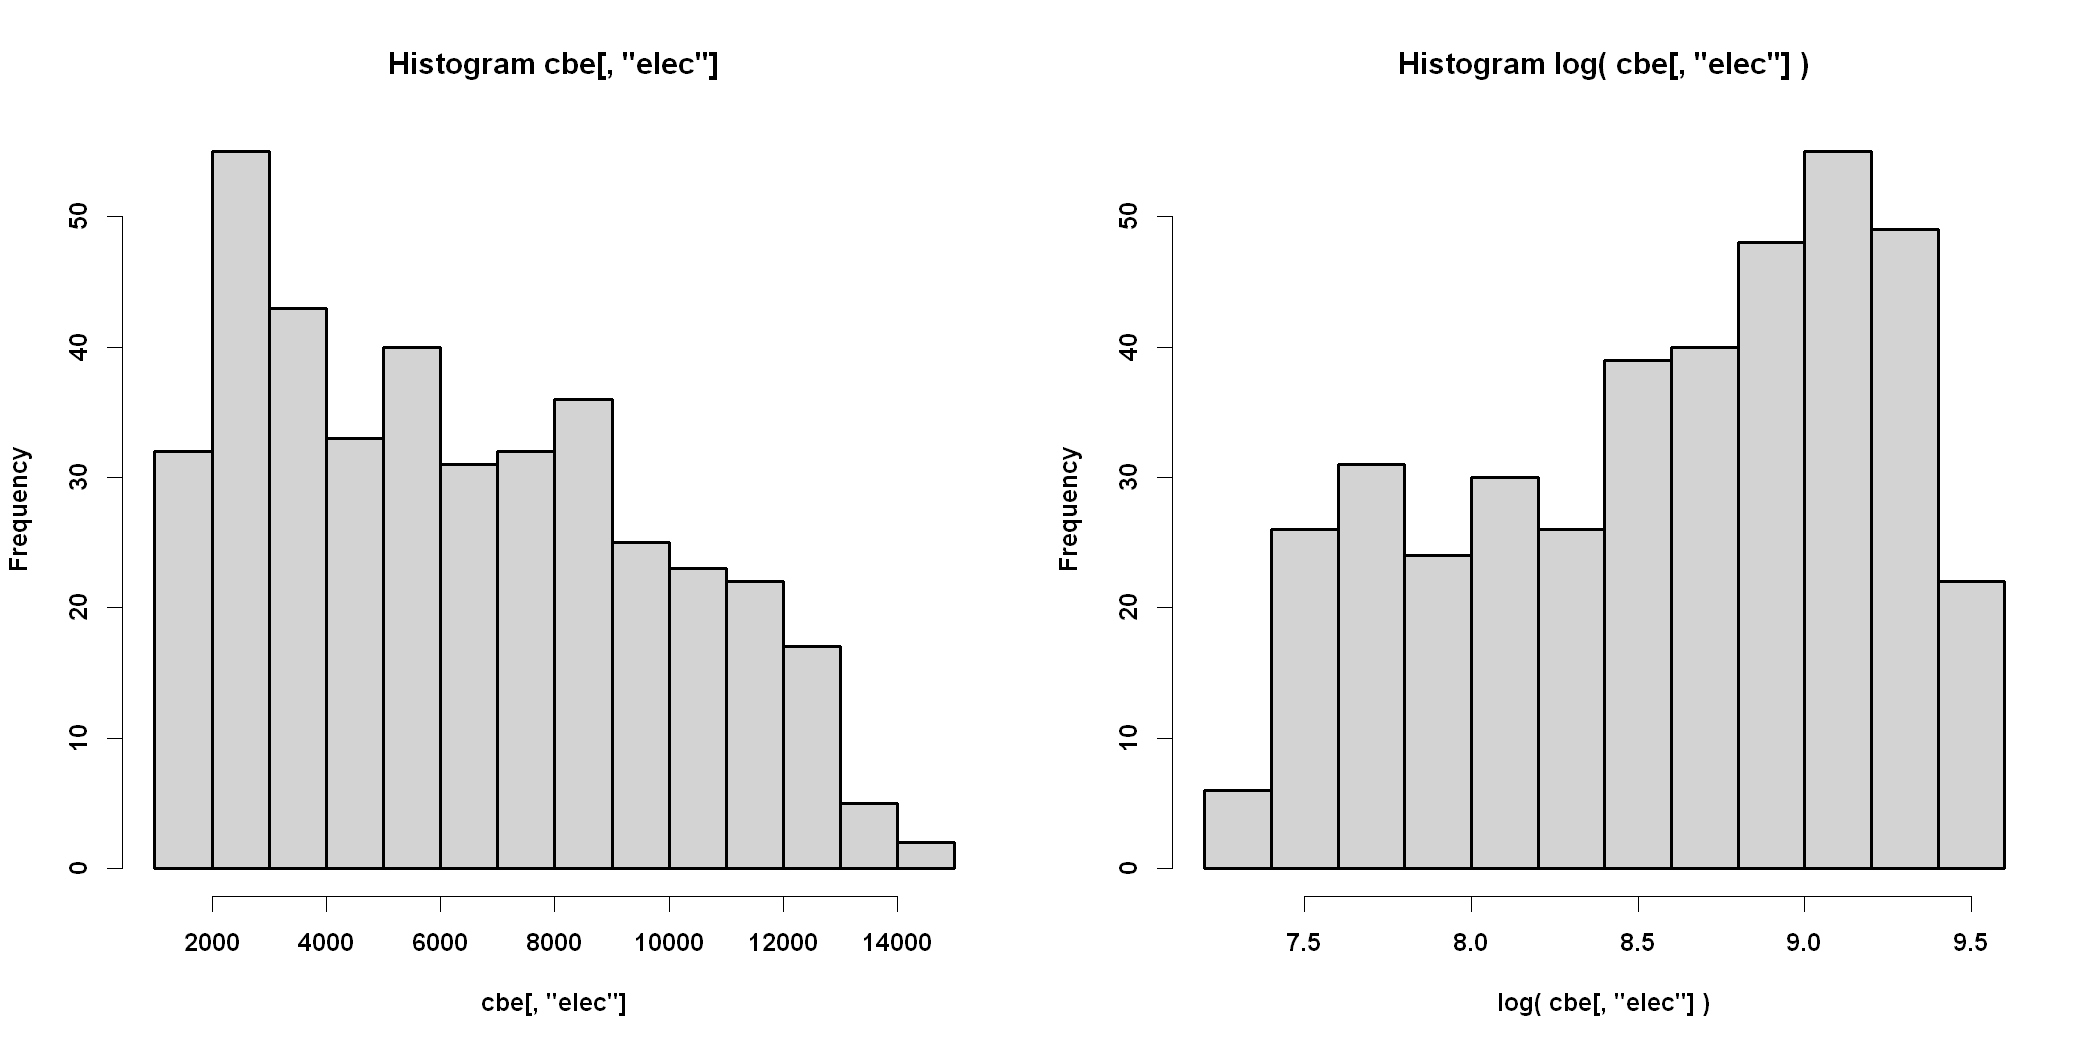

In [207]:
load("cbe.rda")
log_plotted(cbe[,"elec"])

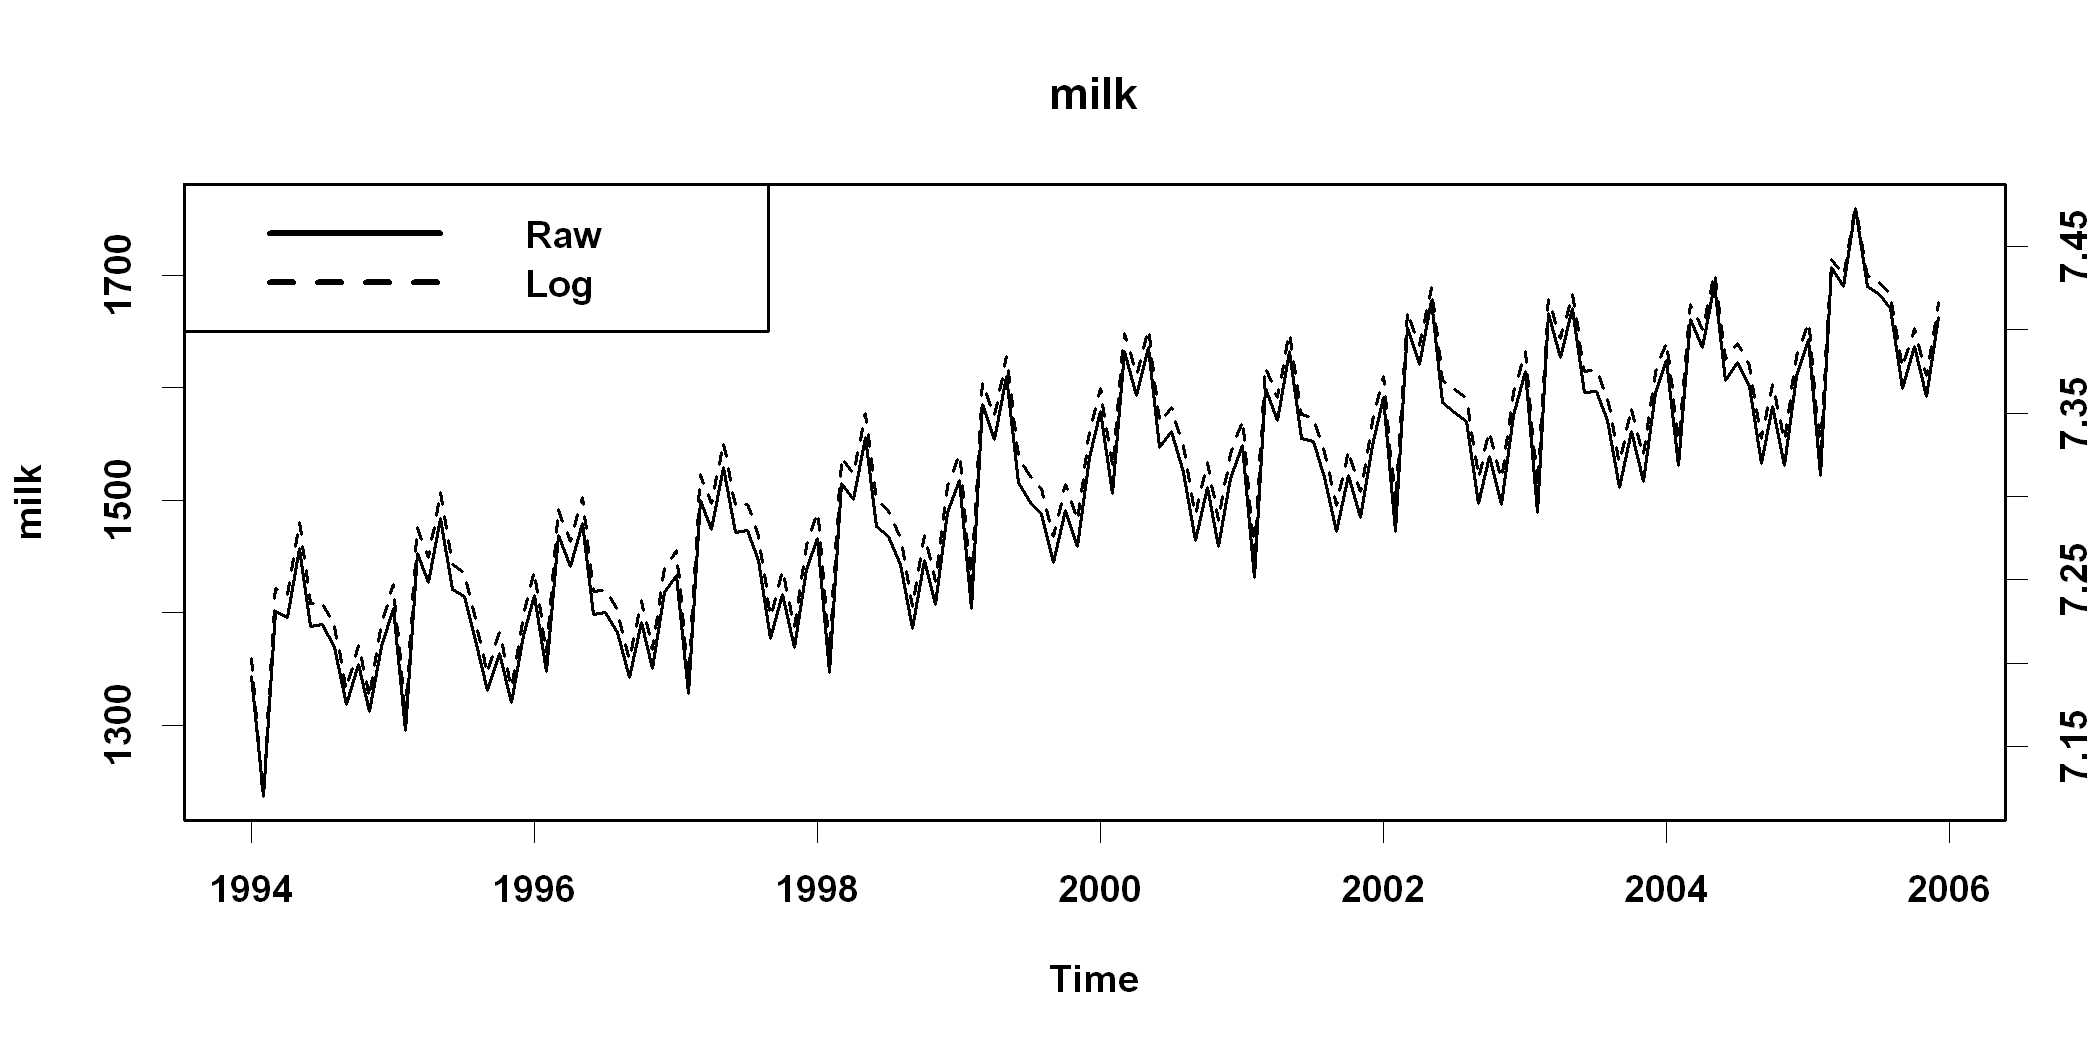

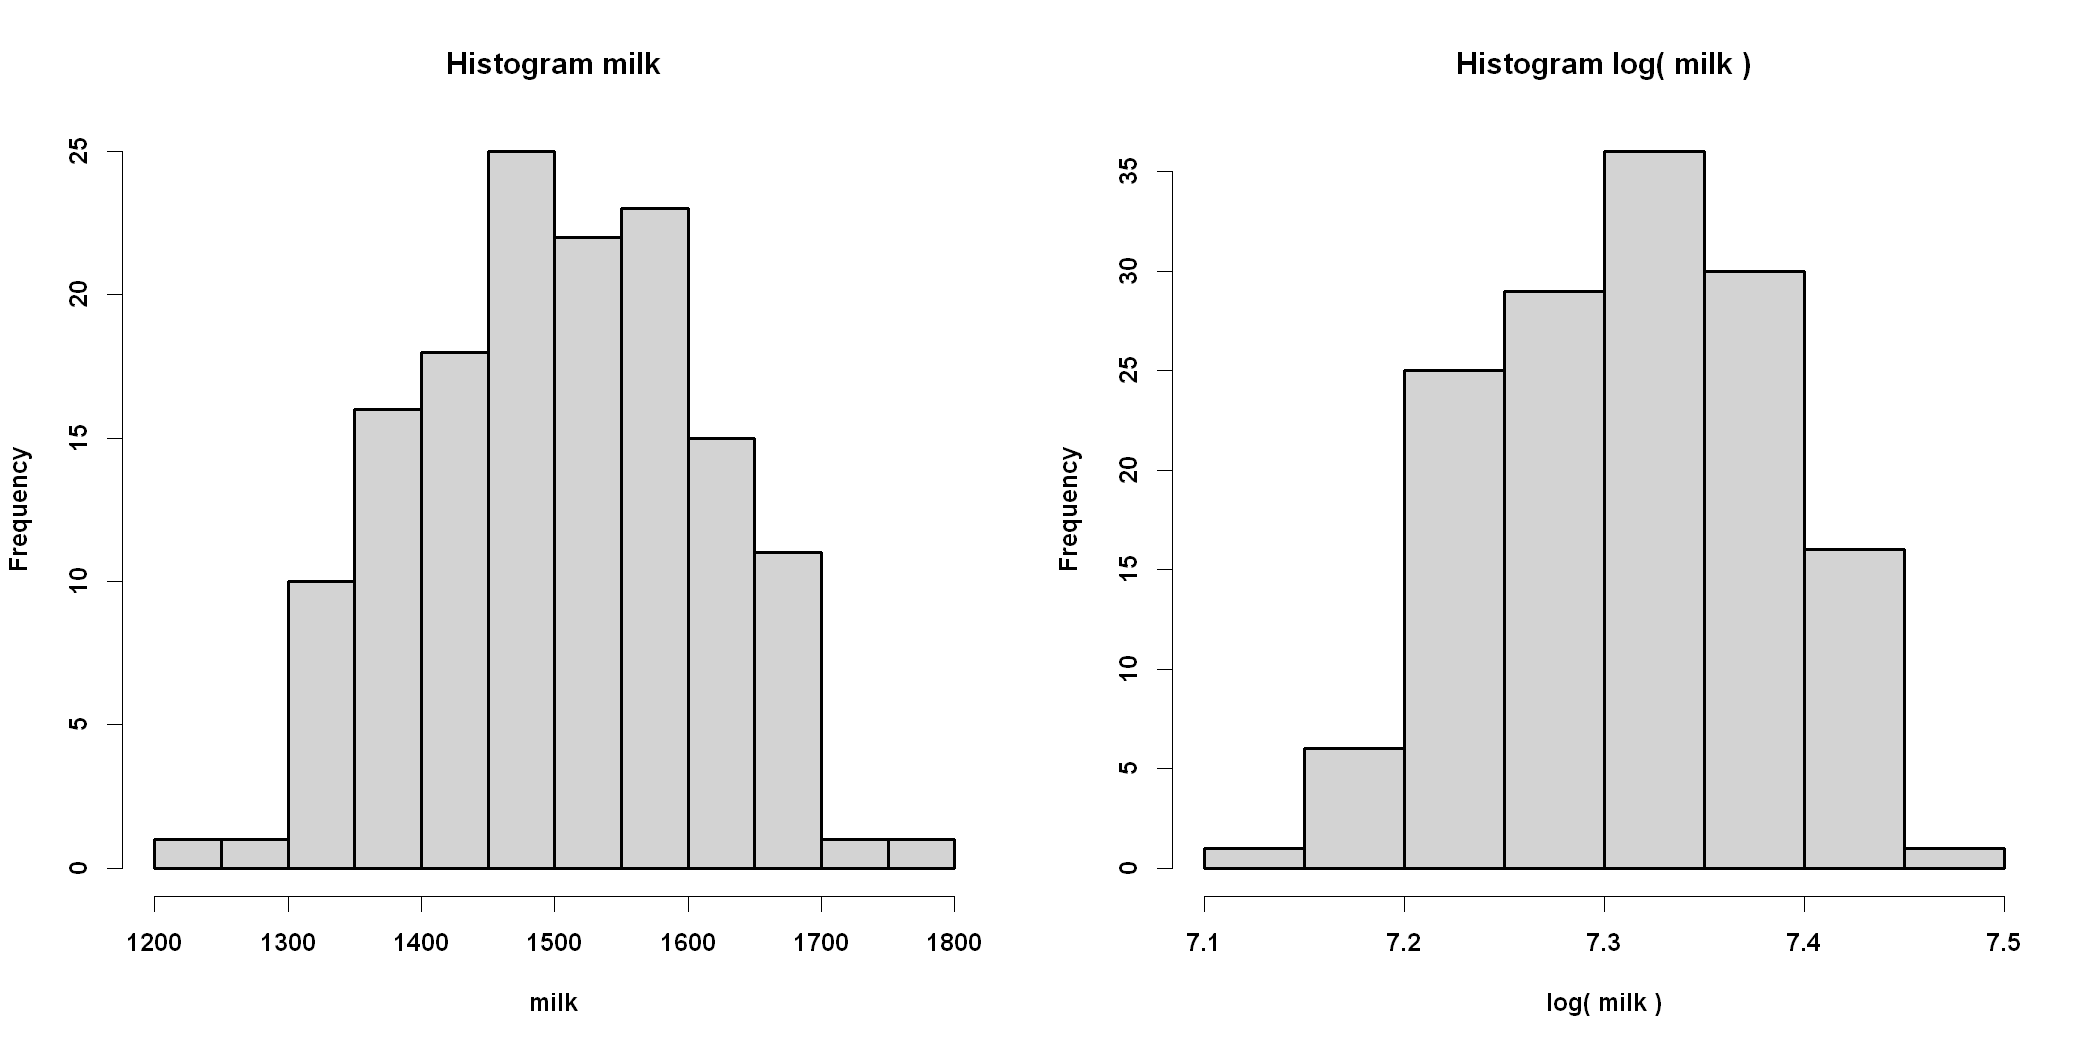

In [208]:
log_plotted(milk)

**No**, 
* it does not lead to a stronger case for the acceptence of the of the stationary hypothesis
* it does not directly solve the relativity of the scale it is rather redundant from that standpoint
* the series is not closed with zero and right open
* the underlying margininal distribution is not right-skewed


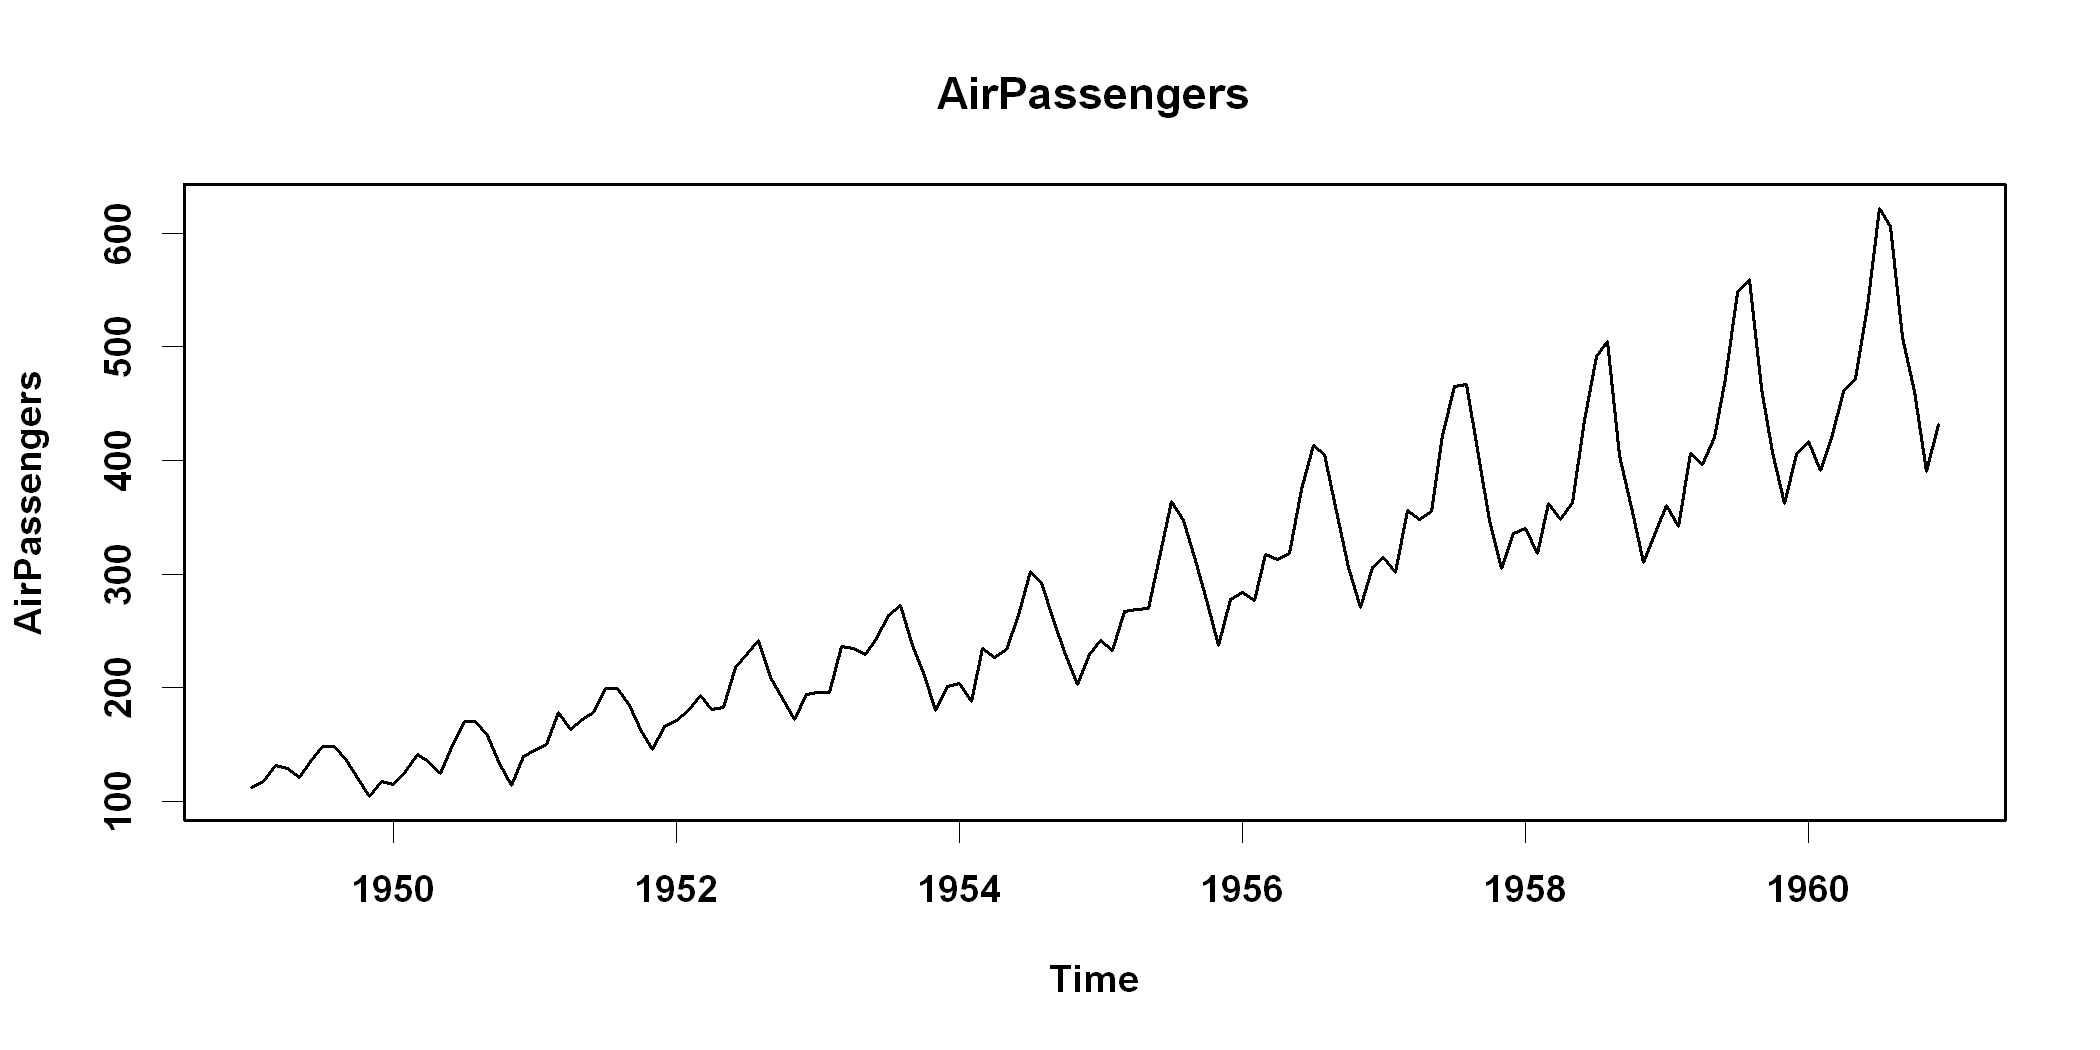

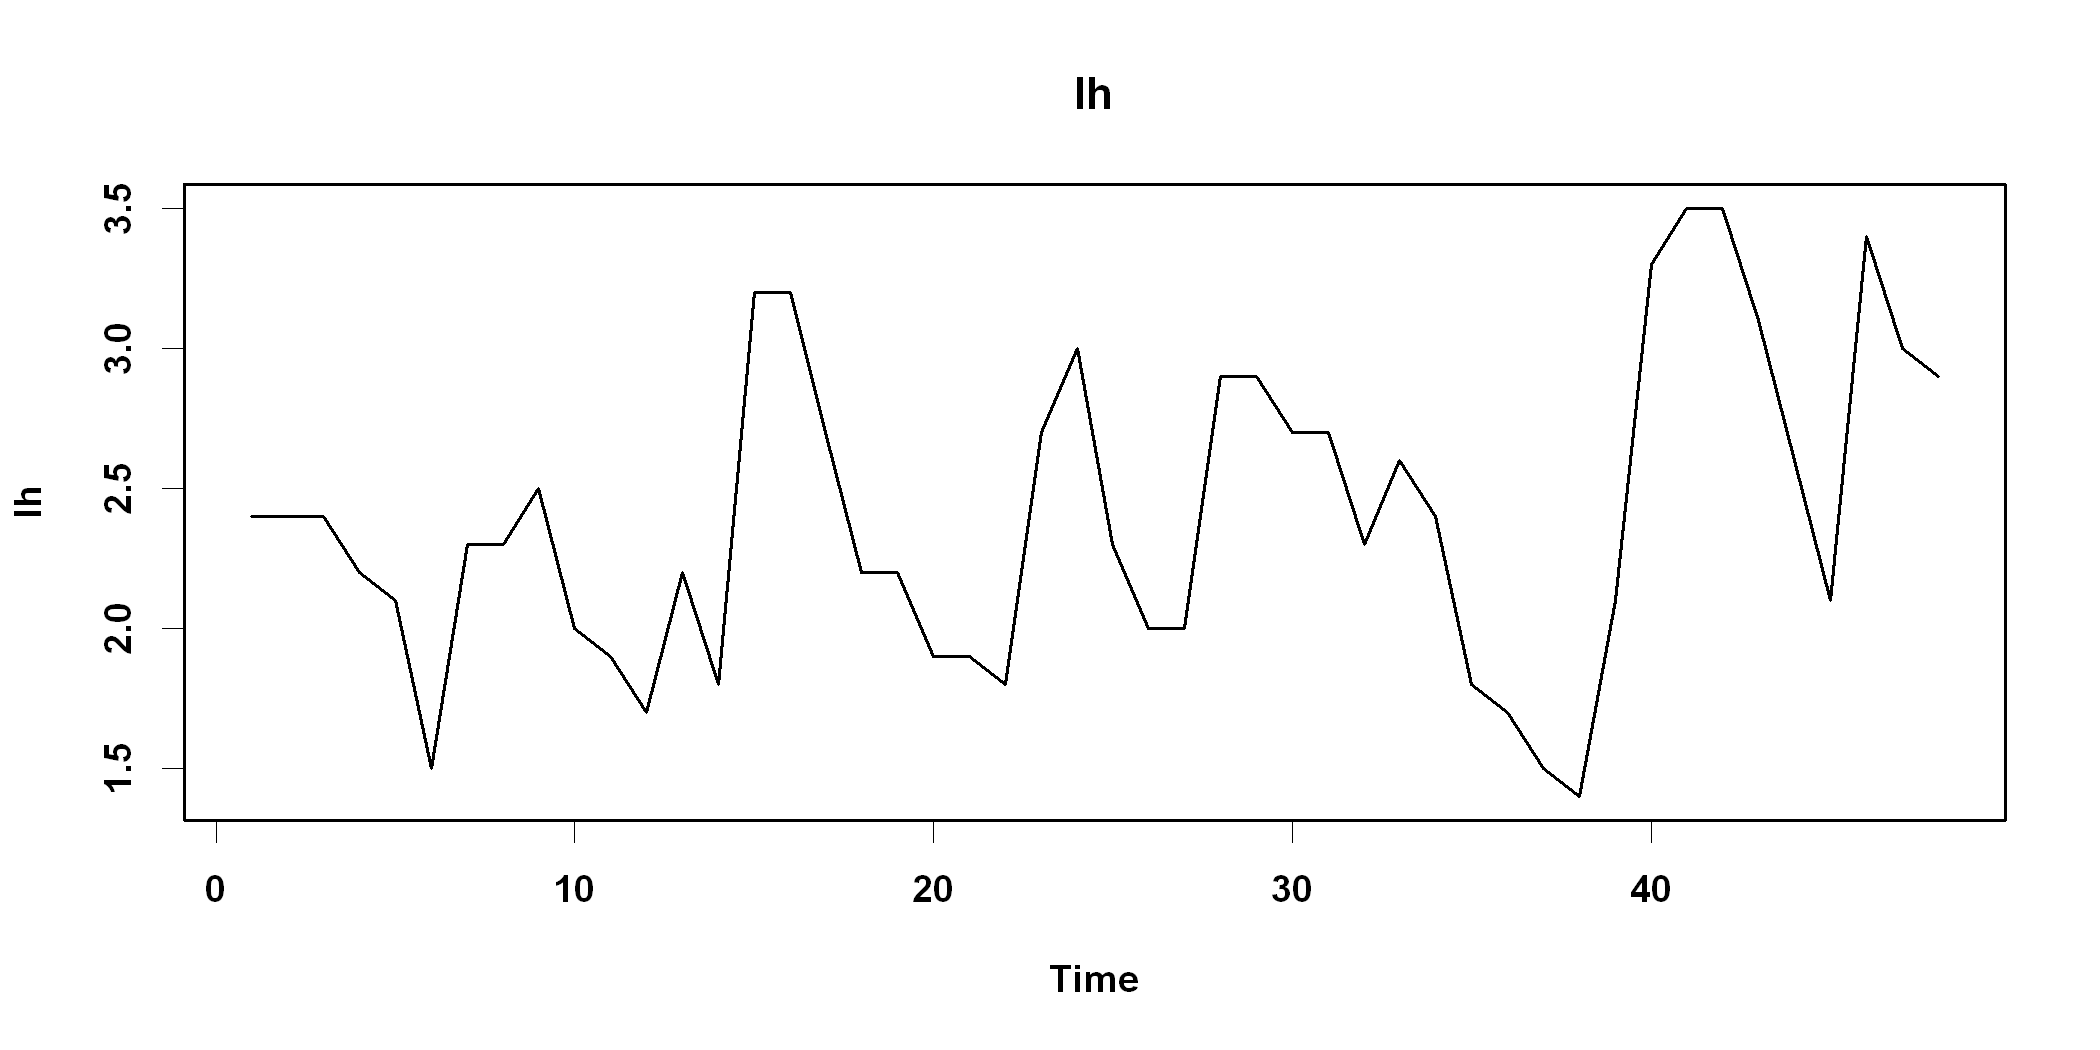

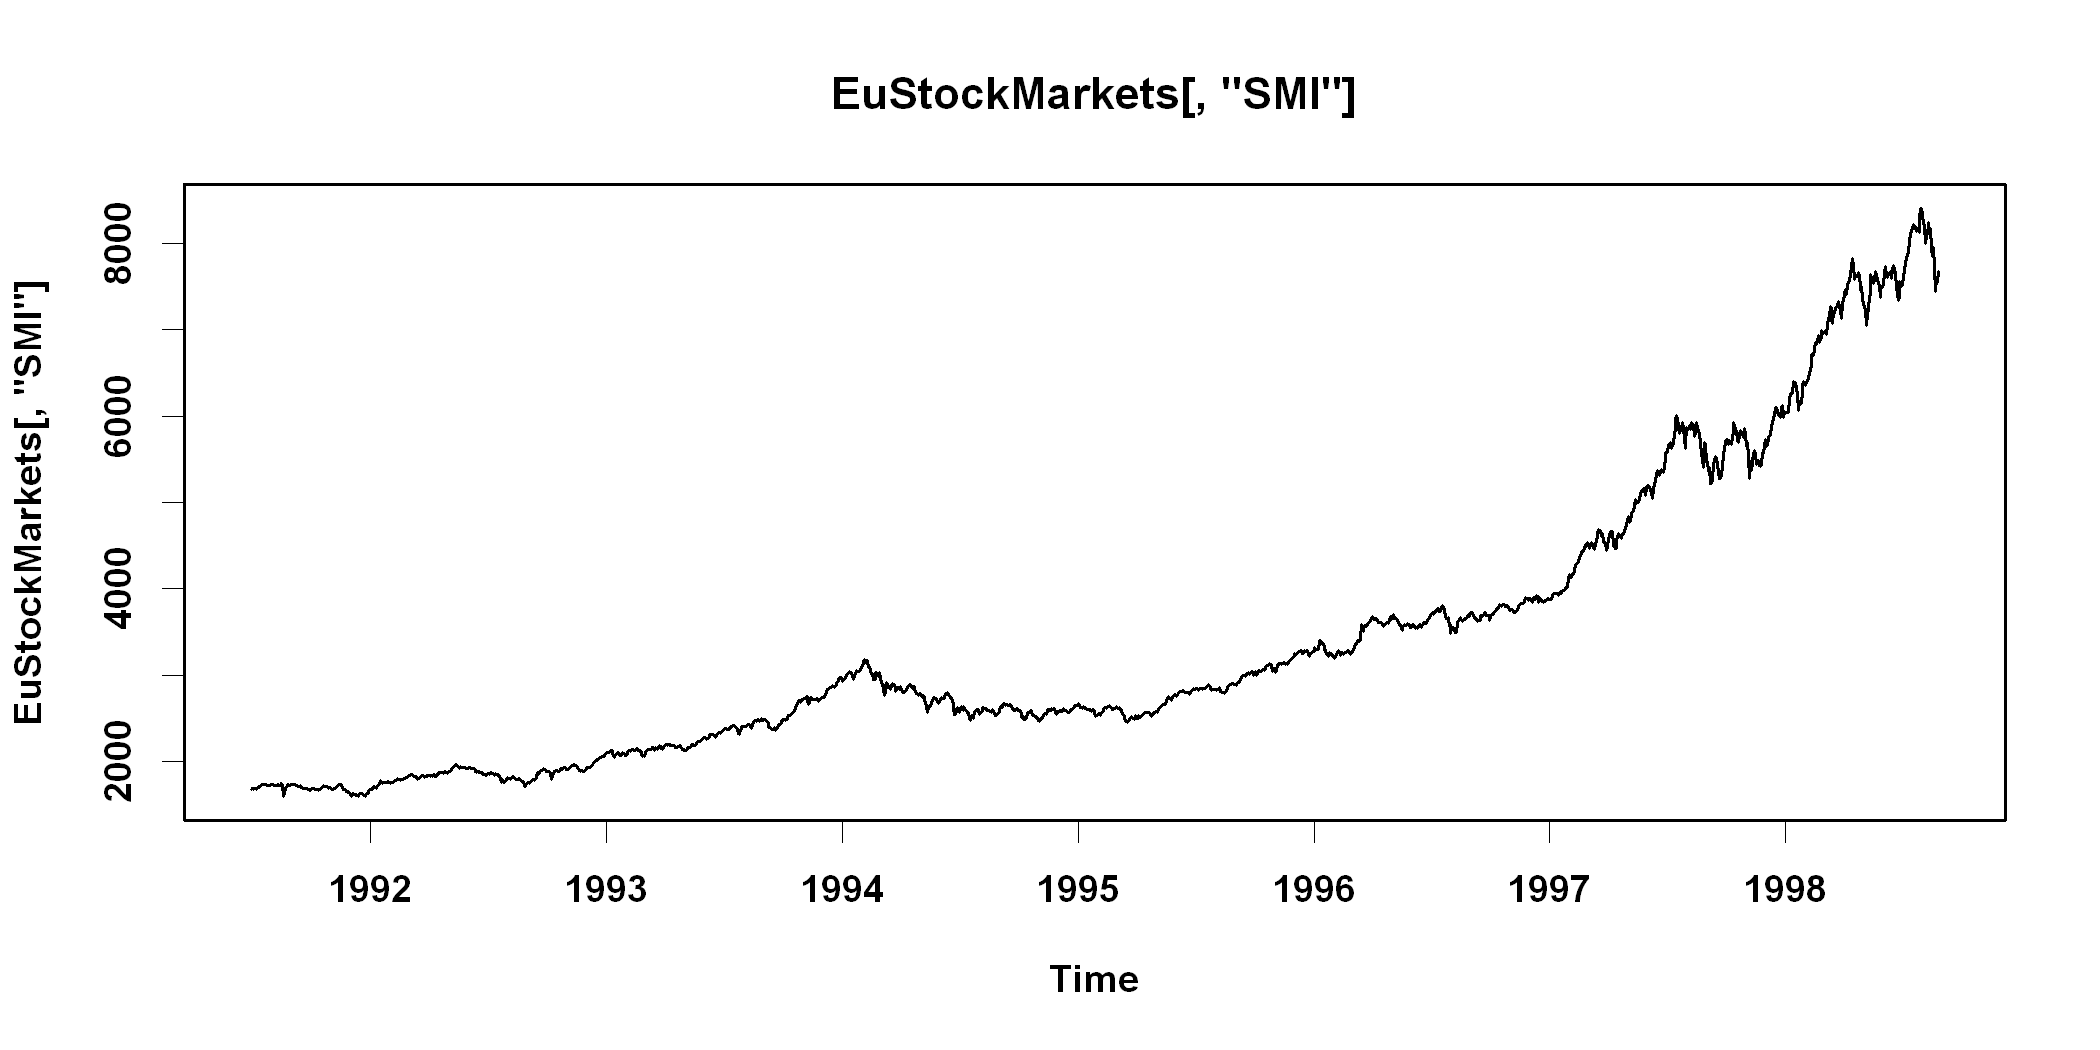

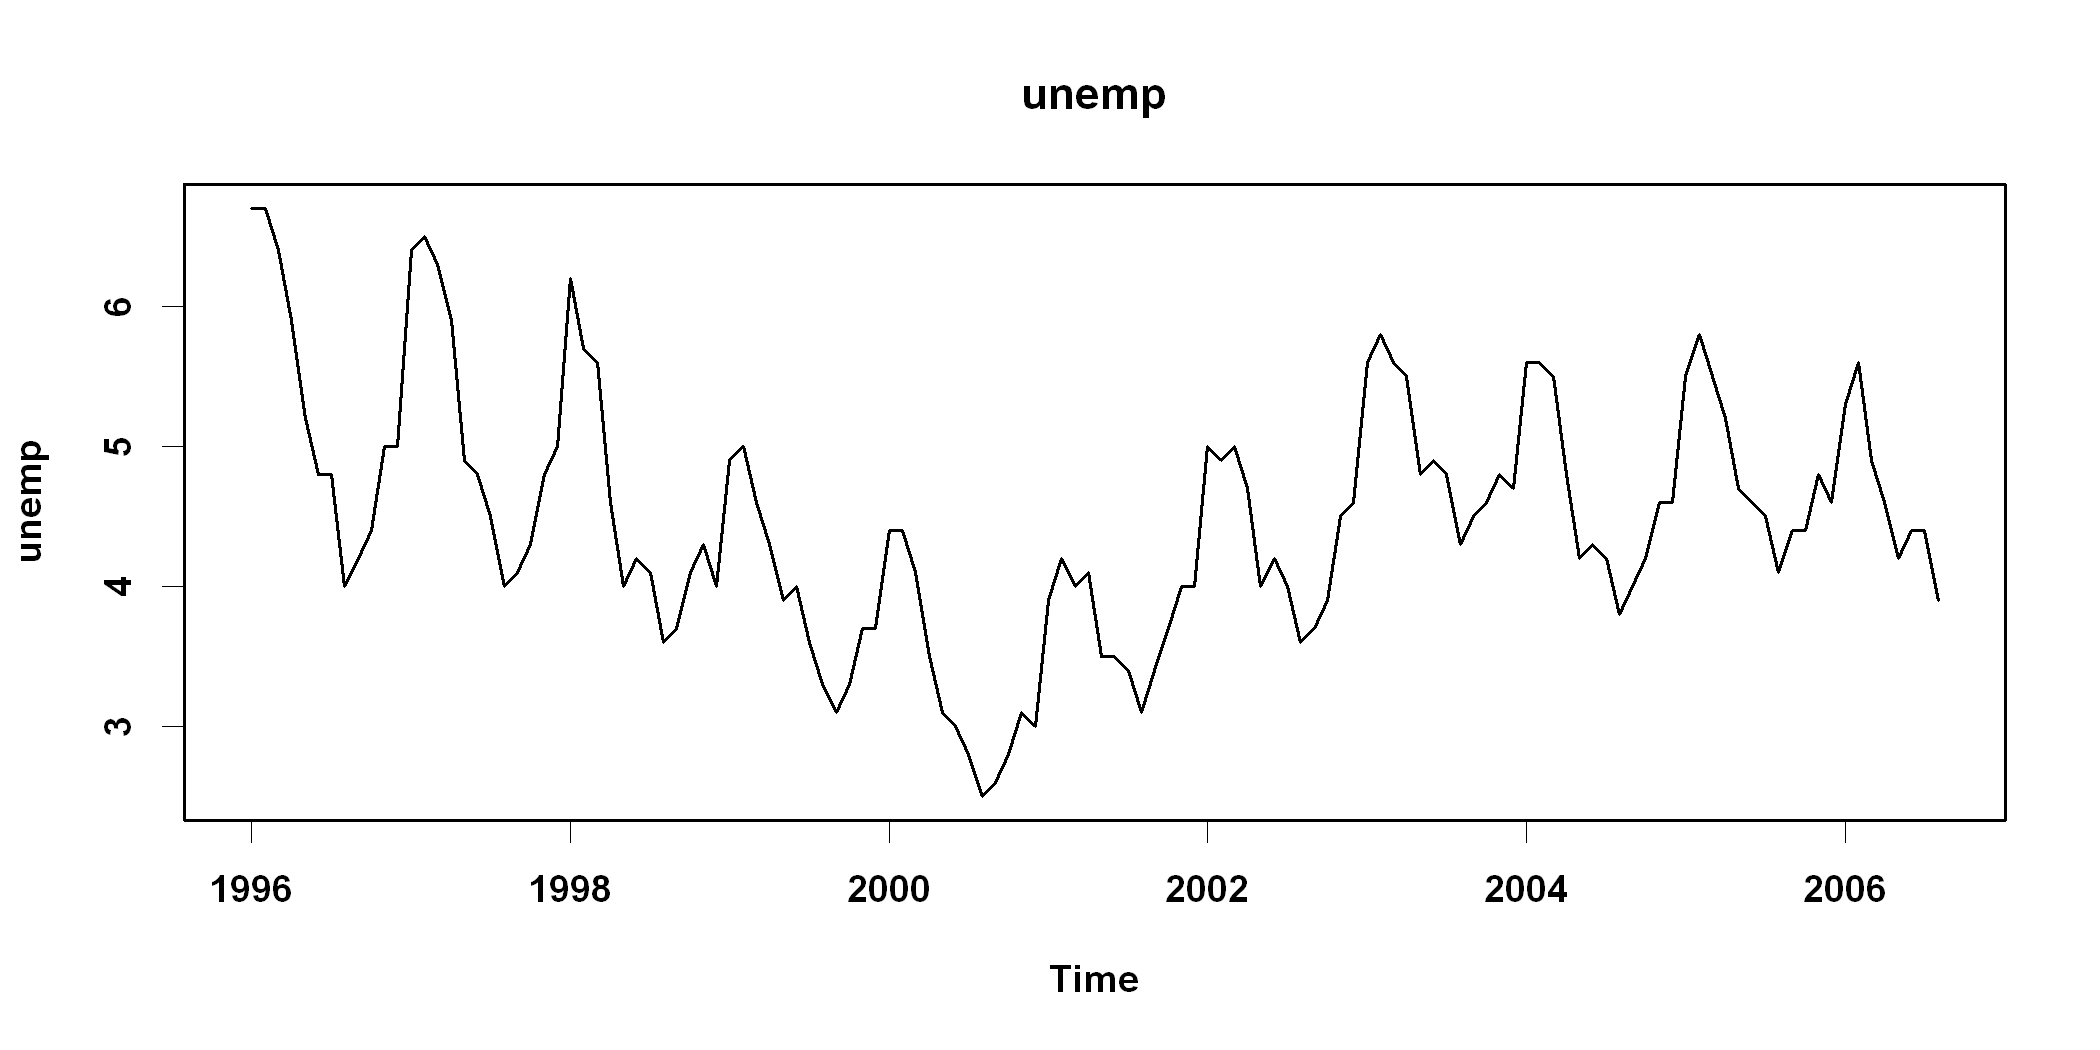

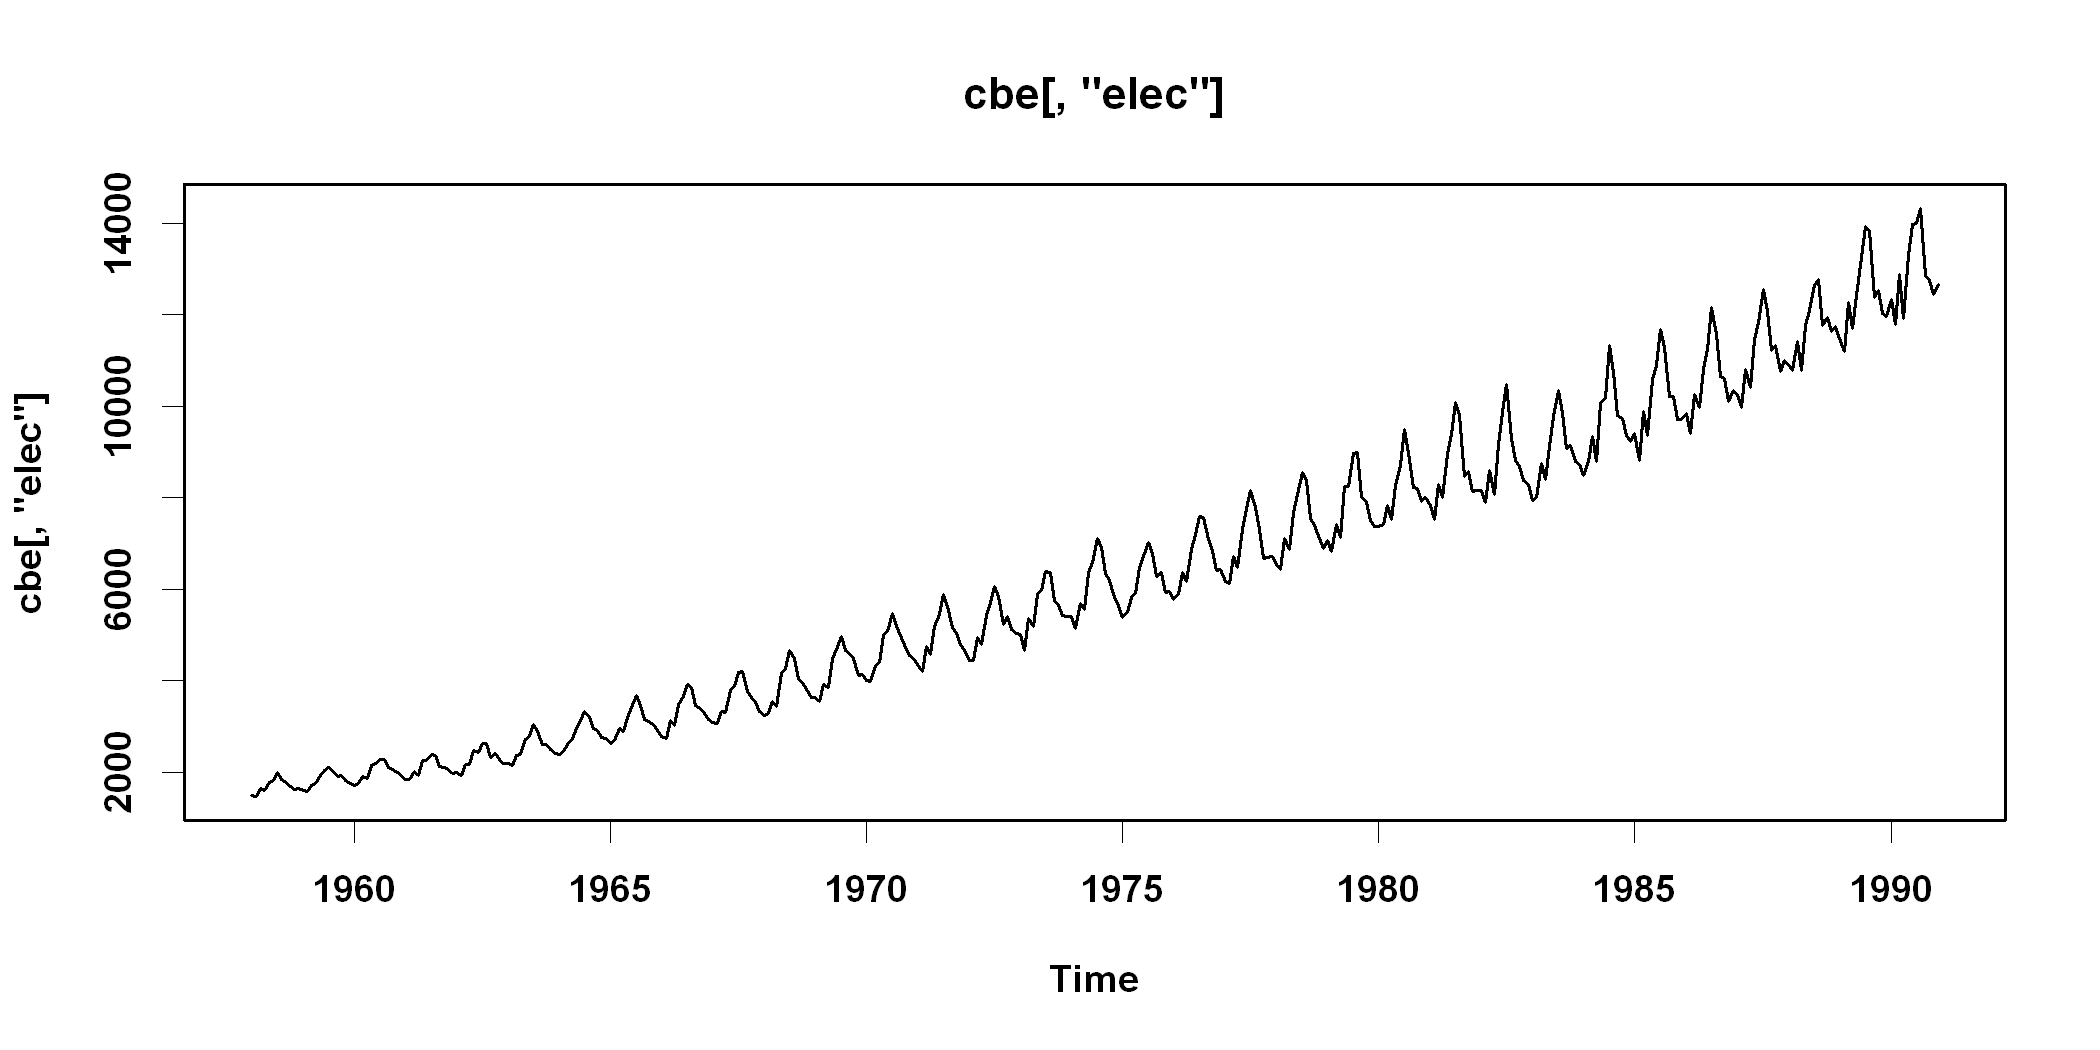

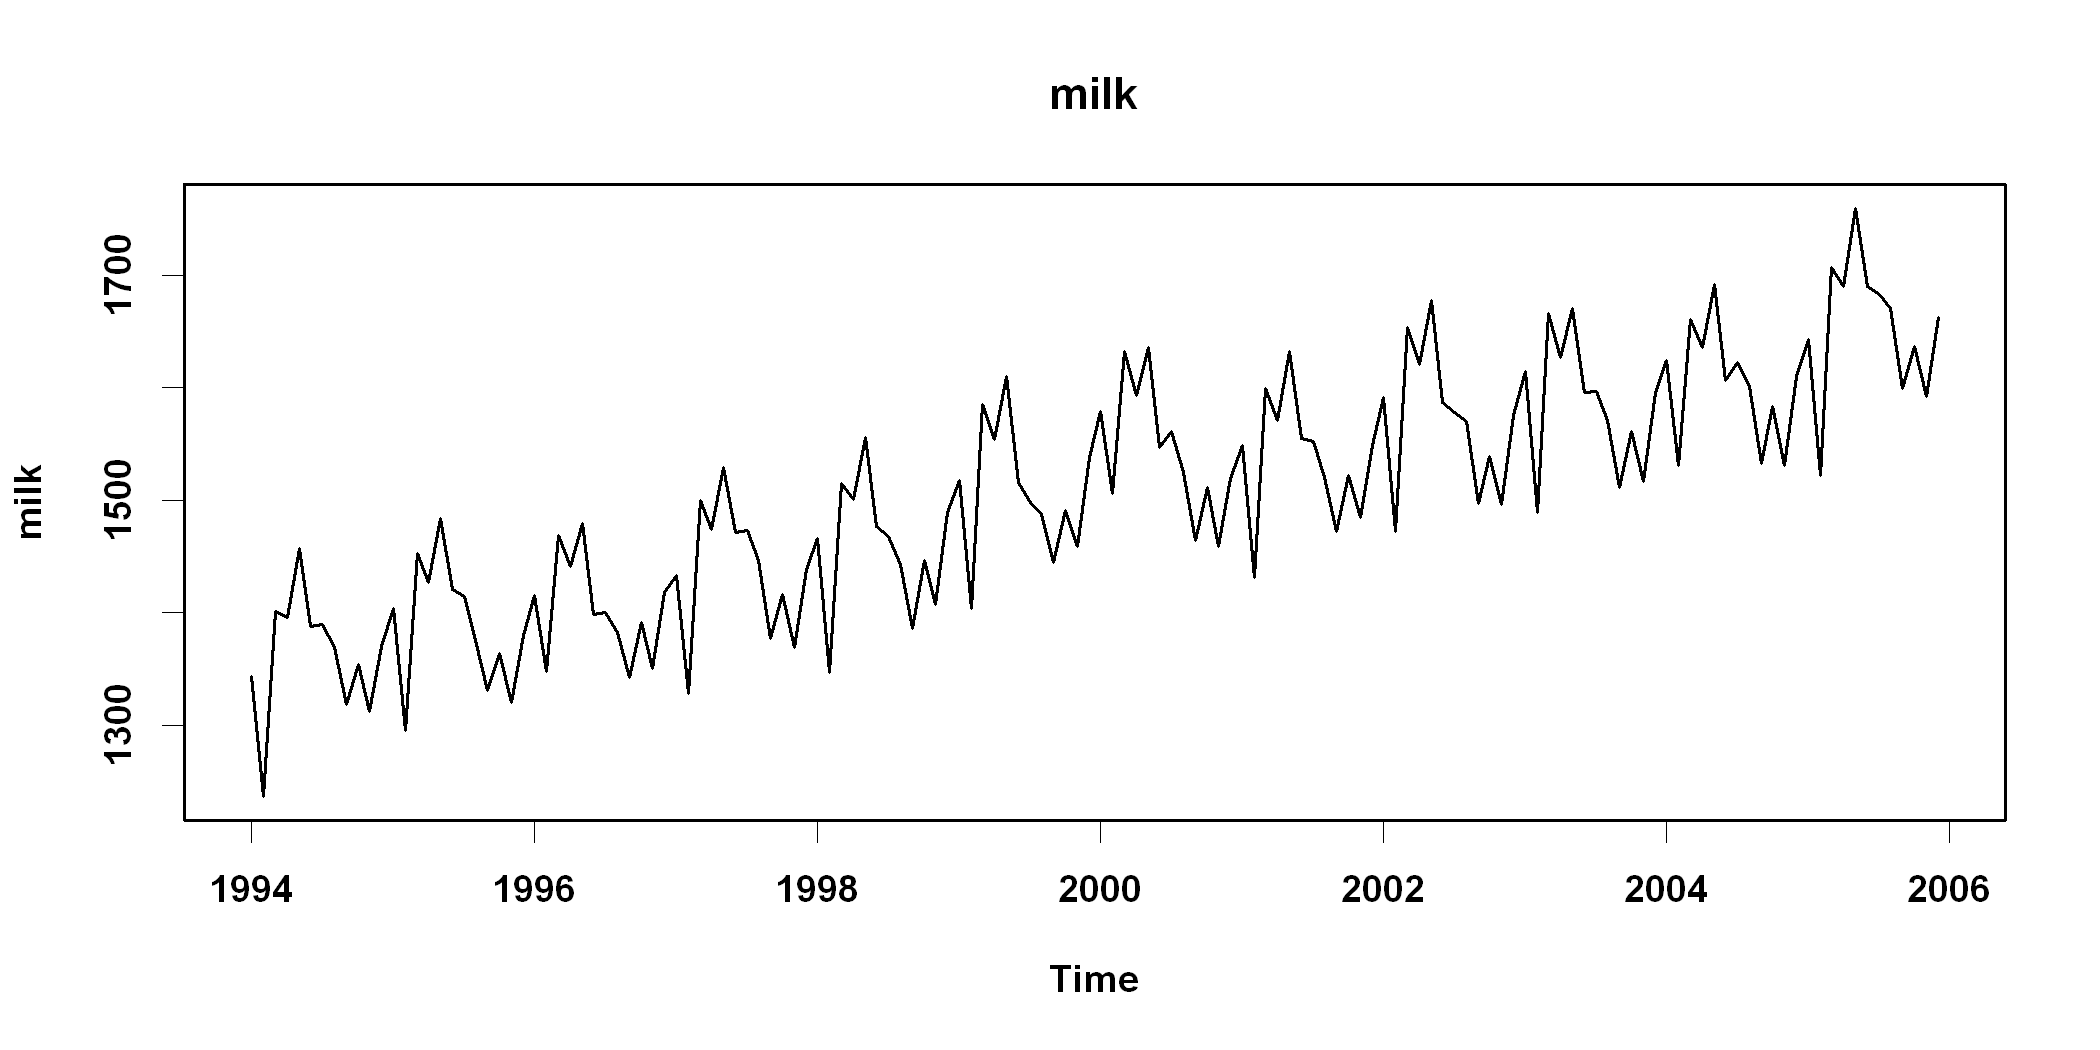

In [214]:
plotted(AirPassengers)
plotted(lh)
plotted(EuStockMarkets[, "SMI"])
plotted(unemp)
plotted(cbe[,"elec"])
plotted(milk)